# Downloading libraries

In [1]:
import sys

# Installing numpy
!{sys.executable} -m pip install numpy

# Installing pandas
!{sys.executable} -m pip install pandas

# Installing matplotlib
!{sys.executable} -m pip install matplotlib

#Installing tqdm
!{sys.executable} -m pip install tqdm

#Installing pyreadstat
!{sys.executable} -m pip install pyreadstat

#Installing openpyxl
!{sys.executable} -m pip install openpyxl

!{sys.executable} -m pip install scipy



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Registering Modules

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\lib")

# Importing Libraries

In [3]:
# Import Statistic Libraries
import utils                  as ut
import numpy                  as np
import pandas                 as pd
import matplotlib.pyplot      as plt

# Import Utility Libraries
from tqdm                     import tqdm
from matplotlib.lines         import Line2D
from scipy.interpolate        import interp1d


# Declaring Local Functions

### Generate

In [4]:
def generate_fridays_per_years(
    ) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:

    dates_2013              : pd.DatetimeIndex = pd.date_range(start='2013-01-01', end='2013-12-31')
    fridays_2013            : pd.DatetimeIndex = dates_2013[dates_2013.dayofweek == 4]
    fridays_2013_dataframe  : pd.DataFrame = pd.DataFrame({'Date': fridays_2013})

    dates_2014              : pd.DatetimeIndex = pd.date_range(start='2014-01-01', end='2014-12-31')
    fridays_2014            : pd.DatetimeIndex = dates_2014[dates_2014.dayofweek == 4]
    fridays_2014_dataframe  : pd.DataFrame = pd.DataFrame({'Date': fridays_2014})

    dates_2015              : pd.DatetimeIndex = pd.date_range(start='2015-01-01', end='2015-12-31')
    fridays_2015            : pd.DatetimeIndex = dates_2015[dates_2015.dayofweek == 4]
    fridays_2015_dataframe  : pd.DataFrame = pd.DataFrame({'Date': fridays_2015})

    dates_2016              : pd.DatetimeIndex = pd.date_range(start='2016-01-01', end='2016-12-31')
    fridays_2016            : pd.DatetimeIndex = dates_2016[dates_2016.dayofweek == 4]
    fridays_2016_dataframe  : pd.DataFrame = pd.DataFrame({'Date': fridays_2016})

    return (
        fridays_2013_dataframe,
        fridays_2014_dataframe,
        fridays_2015_dataframe,
        fridays_2016_dataframe
    )


### Compute

In [5]:
def calculate_study_time(
        df : pd.DataFrame
    ) -> pd.DataFrame:

    df['study'] = df['activity_name'].str.split('/').str[0].str.split(' ').str[0]
    df = df[~df['study'].str.contains('\d|-', regex=True)]

    df['time_spent'] = pd.to_timedelta(df['time_spent'])
    df['date'] = pd.to_datetime(df['date'])

    study_times = df.groupby(
        'study'
    )['time_spent'].agg(['min', 'max', 'sum', 'size'])

    min_dates = df[
        df['time_spent'] == df['time_spent'].min()
    ]['date'].dt.strftime('%Y/%m/%d')
    max_dates = df[
        df['time_spent'] == df['time_spent'].max()
    ]['date'].dt.strftime('%Y/%m/%d')

    average_time = study_times['sum'] / study_times['size']
    max_iterations = 100

    for study in average_time.index:
        iterations = 0

        while (
            study_times.loc[study, 'min'] == pd.Timedelta(0) or
            study_times.loc[study, 'max'] == pd.Timedelta(0) or
            pd.isnull(study_times.loc[study, 'min']) or
            pd.isnull(study_times.loc[study, 'max']) or
            pd.isnull(average_time[study]) or
            average_time[study] < study_times.loc[study, 'min'] or
            average_time[study] > study_times.loc[study, 'max']
        ):
            new_average = (study_times.loc[study, 'min'] + study_times.loc[study, 'max']) / 2

            if pd.isnull(new_average):
                new_average = study_times.loc[study, ['min', 'max']].mean()
                if pd.isnull(new_average):
                    new_average = pd.Timedelta(0)

            average_time[study] = new_average

            iterations += 1
            if iterations >= max_iterations:
                break

        if iterations >= max_iterations:
            average_time[study] = pd.Timedelta(0)

    result = pd.DataFrame({
        'study': study_times.index,
        'min_date': min_dates.min(),
        'min_time': study_times['min'],
        'max_date': max_dates.max(),
        'max_time': study_times['max'],
        'average_time': average_time
    }).reset_index(drop=True)

    result = result.dropna(how='any')

    return result

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:6: SyntaxWarning: invalid escape sequence '\d'
  df = df[~df['study'].str.contains('\d|-', regex=True)]


In [6]:
def calculate_study_hours(
        df  :   pd.DataFrame
    ) -> pd.DataFrame:
    df['time_spent'] = pd.to_timedelta(df['time_spent'])

    study_hours : pd.DataFrame = df.groupby(
        'study'
    )['time_spent'].agg(['min', 'max'])

    study_hours['minimum_hours'] = study_hours['min'] / pd.Timedelta(hours=1)
    study_hours['maximum_hours'] = study_hours['max'] / pd.Timedelta(hours=1)

    study_hours.drop(['min', 'max'], axis=1, inplace=True)

    study_hours : pd.DataFrame = study_hours[
        ~study_hours.index.str.contains('\d|-|Bachelor',
        regex=True)
    ]

    study_hours = study_hours.dropna(how='any')
    return study_hours


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\296677179.py:16: SyntaxWarning: invalid escape sequence '\d'
  ~study_hours.index.str.contains('\d|-|Bachelor',


In [7]:
def last_friday_lesson(df_big: pd.DataFrame, df_fridays: pd.DataFrame) -> pd.DataFrame:
    df_big['date'] = pd.to_datetime(df_big['date'])
    df_big['start_date'] = pd.to_timedelta(df_big['start_date'])


    lessons_starting_late = df_big[
        df_big['start_date'] >= pd.Timedelta(hours=17, minutes=30)
    ]

    fridays = pd.to_datetime(df_fridays['Date'])

    study_list = []
    last_friday_lesson_list = []
    lesson_start_time_list = []

    for study in lessons_starting_late['study'].unique():
        study_lessons = lessons_starting_late[
            lessons_starting_late['study'] == study
        ]

        for friday in fridays:
            friday_lessons = study_lessons[study_lessons['date'] >= friday]
            if not friday_lessons.empty:
                latest_lesson = friday_lessons.sort_values(
                    by='date',
                    ascending=False
                ).head(1)
                study_list.append(study)
                last_friday_lesson_list.append(
                    latest_lesson.iloc[0]['date'].strftime('%Y-%m-%d')
                )
                lesson_start_time_list.append(
                    latest_lesson.iloc[0]['start_date']
                )
                break

    result = pd.DataFrame({
        'study': study_list,
        'latest_friday_lesson_date': last_friday_lesson_list,
        'lesson_start_time': lesson_start_time_list
    })

    return result

In [8]:
def check_early_lessons(df: pd.DataFrame) -> pd.DataFrame:
    df['date'] = pd.to_datetime(df['date'])
    df['start_date'] = pd.to_timedelta(df['start_date'])

    df = df[~df['study'].str.contains('\d|-|Bachelor', regex=True)]

    unique_studies = df['study'].unique()

    study_early_lessons_counts = []

    for study in unique_studies:
        study_df = df[df['study'] == study]

        true_count = 0
        false_count = 0

        for date in study_df['date'].unique():
            filtered_df = study_df[
                (study_df['date'] == date) &
                (study_df['start_date'] >= pd.Timedelta(hours=15, minutes=30))
            ]

            if not filtered_df.empty:
                next_day = date + pd.Timedelta(days=1)

                has_early_lessons_next_day = (
                    study_df[
                        (study_df['date'] == next_day) &
                        (study_df['start_date'] < pd.Timedelta(hours=10, minutes=45))
                    ].shape[0] > 0
                )

                if has_early_lessons_next_day:
                    true_count += 1
                else:
                    false_count += 1

        study_early_lessons_counts.append(
            (study, true_count, false_count)
        )

    result = pd.DataFrame(
        study_early_lessons_counts,
        columns=['study', 'amount_yes', 'amount_no']
    )
    result['has_had_early_lessons'] = result['amount_yes'] > 0

    return result

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1843152358.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = df[~df['study'].str.contains('\d|-|Bachelor', regex=True)]


In [9]:
def calculate_hours_per_day(
        dataframe_courses   : pd.DataFrame,
        dataframe_activity  : pd.DataFrame
    ) -> pd.DataFrame:

    dataframe_courses['Course'] = pd.to_numeric(
        dataframe_courses['Course'],
        errors='coerce'
    ).fillna(-1).astype(int)

    dataframe_activity['hostkey'] = pd.to_numeric(
        dataframe_activity['hostkey'],
        errors='coerce'
    ).fillna(-1).astype(int)

    dataframe_activity['hostkey.1'] = pd.to_numeric(
        dataframe_activity['hostkey.1'],
        errors='coerce'
    ).fillna(-1).astype(int)

    merged_dataframe : pd.DataFrame = pd.merge(
        dataframe_courses,
        dataframe_activity,
        left_on='Course',
        right_on='hostkey',
        how='inner'
    )
    merged_dataframe : pd.DataFrame = pd.concat([
        merged_dataframe, pd.merge(
            dataframe_courses,
            dataframe_activity,
            left_on='Course',
            right_on='hostkey.1',
            how='inner'
        )
    ])

    merged_dataframe['time_spent'] = pd.to_timedelta(merged_dataframe['time_spent'])

    grouped_dataframe : pd.DataFrame = merged_dataframe.groupby(
        ['Teacher-lastname', 'date']
    )['time_spent'].sum().reset_index()

    course_count_dataframe = merged_dataframe.groupby(
        'Teacher-lastname'
    )['Course'].nunique().reset_index()
    course_count_dataframe.rename(
        columns={'Course': 'course_count'},
        inplace=True
    )

    min_hours_per_day_dataframe = grouped_dataframe.groupby(
        'Teacher-lastname'
    )['time_spent'].min().reset_index()
    min_hours_per_day_dataframe.rename(
        columns={'time_spent': 'min_hour_spent_per_day'},
        inplace=True
    )

    min_hours_per_day_dataframe['min_hour_spent_per_day'] = min_hours_per_day_dataframe['min_hour_spent_per_day'].fillna(pd.Timedelta(minutes=1))

    max_hours_per_day_dataframe = grouped_dataframe.groupby(
        'Teacher-lastname'
    )['time_spent'].max().reset_index()
    max_hours_per_day_dataframe.rename(
        columns={'time_spent': 'max_hour_spent_per_day'},
        inplace=True
    )

    for index, row in max_hours_per_day_dataframe.iterrows():
        if row['max_hour_spent_per_day'] > pd.Timedelta(hours=12):
            teacher_dataframe = merged_dataframe[
                (merged_dataframe['Teacher-lastname'] == row['Teacher-lastname']) &
                (merged_dataframe['time_spent'] < pd.Timedelta(hours=12))
            ]
            max_hours_per_day_dataframe.at[index, 'max_hour_spent_per_day'] = teacher_dataframe['time_spent'].max()

    min_max_hours_dataframe = pd.merge(
        min_hours_per_day_dataframe,
        max_hours_per_day_dataframe,
        on='Teacher-lastname',
        how='outer'
    )

    min_max_hours_dataframe['min_hour_spent_per_day'] = min_max_hours_dataframe[
        ['min_hour_spent_per_day', 'max_hour_spent_per_day']
    ].min(axis=1)

    result_dataframe : pd.DataFrame = pd.merge(
        course_count_dataframe,
        min_max_hours_dataframe,
        on='Teacher-lastname',
        how='outer'
    )

    return result_dataframe

In [10]:
def check_teacher_classes(
        dataframe_courses   : pd.DataFrame,
        dataframe_activity  : pd.DataFrame
    ) -> pd.DataFrame:

    dataframe_courses['Course'] = pd.to_numeric(
        dataframe_courses['Course'],
        errors='coerce'
    ).fillna(-1).astype(int)
    dataframe_activity['hostkey'] = pd.to_numeric(
        dataframe_activity['hostkey'],
        errors='coerce'
    ).fillna(-1).astype(int)
    dataframe_activity['hostkey.1'] = pd.to_numeric(
        dataframe_activity['hostkey.1'],
        errors='coerce'
    ).fillna(-1).astype(int)

    merged_dataframe : pd.DataFrame = pd.merge(
        dataframe_courses,
        dataframe_activity,
        left_on='Course',
        right_on='hostkey',
        how='inner'
    )
    merged_dataframe : pd.DataFrame = pd.concat([
        merged_dataframe,
        pd.merge(
            dataframe_courses,
            dataframe_activity,
            left_on='Course',
            right_on='hostkey.1',
            how='inner'
        )
    ])

    result_df : pd.DataFrame = pd.DataFrame(
        columns=['teacher', 'had_late_class', 'had_early_morning_class_next_day']
    )

    for teacher in merged_dataframe['Teacher-lastname'].unique():
        teacher_records = merged_dataframe[
            merged_dataframe['Teacher-lastname'] == teacher
        ]

        late_class = any(teacher_records['start_date'] >= pd.Timedelta(hours=15, minutes=30))

        if late_class:
            possible_courses = teacher_records['Course'].unique()
            for course in possible_courses:
                course_records = teacher_records[
                    teacher_records['Course'] == course
                ]

                next_day = course_records['date'] + pd.Timedelta(days=1)
                early_morning_class_next_day = any(
                    (course_records['start_date'] < pd.Timedelta(hours=10, minutes=30)) &
                    (course_records['date'].isin(next_day))
                )

                if early_morning_class_next_day:
                    result_df = pd.concat([
                        result_df, pd.DataFrame({
                            'teacher': [teacher],
                            'had_late_class': [True],
                            'had_early_morning_class_next_day': [True]
                        })],
                        ignore_index=True
                    )
                    break
            else:
                result_df = pd.concat([
                    result_df,
                    pd.DataFrame({
                        'teacher': [teacher],
                        'had_late_class': [True],
                        'had_early_morning_class_next_day': [False]
                    })],
                    ignore_index=True
                )
        else:
            result_df = pd.concat([
                result_df,
                pd.DataFrame({
                    'teacher': [teacher],
                    'had_late_class': [False],
                    'had_early_morning_class_next_day': [False]
                })],
                ignore_index=True
            )

    return result_df


In [11]:
def analyze_room_usage(
    dataframe : pd.DataFrame
    ) -> pd.DataFrame:
    room_groups = dataframe.groupby('room_name')

    result_df : pd.DataFrame = pd.DataFrame(
        columns=['room', 'occupation', 'total_people', 'most_popular_study']
    )

    for room_name, room_data in room_groups:
        total_time = room_data['time_spent'].sum()
        total_available_time = pd.Timedelta(hours=12) * len(room_data['date'].unique())

        occupation = min(
            round(
                (total_time / total_available_time) * 100, 2
            ),
            100
        )

        total_people = room_data['size'].sum()

        most_popular_study = room_data[
            'study'
        ].mode().iloc[0] if not room_data.empty else None

        result_df = pd.concat([
            result_df,
            pd.DataFrame({
                'room': [room_name],
                'occupation': [occupation],
                'total_people': [total_people],
                'most_popular_study': [most_popular_study]
            })],
            ignore_index=True
        )

    result_df = result_df.drop_duplicates(subset=['room'])

    return result_df

In [12]:
def calculate_free_time(
        df: pd.DataFrame
    ) -> pd.DataFrame:
    df['study'] = df[
        'activity_name'
    ].str.split('/').str[0].str.split(' ').str[0]

    df = df[~df['study'].str.contains('\d|-', regex=True)]

    df['time_spent'] = pd.to_timedelta(df['time_spent'])
    df['date'] = pd.to_datetime(df['date'])

    study_times = df.groupby('study')['time_spent'].agg(['min', 'max', 'sum', 'size'])

    min_dates = df[
        df['time_spent'] == df['min']
    ]['date'].dt.strftime('%Y/%m/%d')

    max_dates = df[
        df['time_spent'] == df['max']
    ]['date'].dt.strftime('%Y/%m/%d')

    average_time = study_times['sum'] / study_times['size']

    for study in average_time.index:
        if study_times.loc[study, 'min'] <= average_time[study] <= study_times.loc[study, 'max']:
            continue

        while True:
            new_average = (study_times.loc[study, 'min'] + study_times.loc[study, 'max']) / 2
            if study_times.loc[study, 'min'] <= new_average <= study_times.loc[study, 'max']:
                average_time[study] = new_average
                break

    result = pd.DataFrame({
        'study': study_times.index,
        'min_date': min_dates.min(),
        'min_time': study_times['min'],
        'max_date': max_dates.max(),
        'max_time': study_times['max'],
        'average_time': average_time
    }).reset_index(drop=True)

    return result

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\3385406613.py:8: SyntaxWarning: invalid escape sequence '\d'
  df = df[~df['study'].str.contains('\d|-', regex=True)]


In [13]:
def calculate_series_free_time(
        dataframe : pd.DataFrame
    ) -> pd.DataFrame:

    dataframe['date'] = pd.to_datetime(dataframe['date'])

    grouped_by_date = dataframe.groupby('date')

    result_df = pd.DataFrame(columns=['day', 'used_time'])

    for date, date_data in grouped_by_date:
        date_data = date_data.sort_values(by='start_date')

        start_dates = date_data['start_date'].tolist()
        end_dates = date_data['end_date'].tolist()

        time_diff_list = []

        for i in range(1, len(start_dates)):
            time_diff = start_dates[i] - end_dates[i - 1]
            time_diff_list.append(
                time_diff
            )

        if not time_diff_list or all(
            diff == pd.Timedelta(0) for diff in time_diff_list
        ):
            continue

        max_time_diff = max(time_diff_list)

        if max_time_diff.total_seconds() < 0:
            continue

        result_df = pd.concat([
            result_df,
            pd.DataFrame({
                'day': [date],
                'used_time': [max_time_diff]
            })],
            ignore_index=True
        )
    return result_df


In [14]:
def calculate_course_activity(dataframe1, dataframe2):
    dataframe2['hostkey'] = pd.to_numeric(
        dataframe2['hostkey'],
        errors='coerce'
    ).fillna(-1)

    dataframe2['hostkey.1'] = pd.to_numeric(
        dataframe2['hostkey.1'],
        errors='coerce'
    ).fillna(-1)

    merged_dataframe = pd.merge(
        dataframe1,
        dataframe2,
        left_on=['hostkey', 'hostkey.1'],
        right_on=['hostkey', 'hostkey.1'],
        how='inner'
    )

    grouped = merged_dataframe.groupby(
        ['course', 'course_name']
    )['time_spent']

    total_hours_per_course = grouped.sum().reset_index()
    average_hours_per_course = grouped.mean().reset_index()
    min_hours_per_course = grouped.min().reset_index()
    max_hours_per_course = grouped.max().reset_index()


    result_df = pd.DataFrame({
        'course_name': total_hours_per_course['course_name'],
        'hours_total': total_hours_per_course['time_spent'],
        'hours_average': average_hours_per_course['time_spent'],
        'hours_min': min_hours_per_course['time_spent'],
        'hours_max': max_hours_per_course['time_spent']
    })

    return result_df

### Plotting

In [15]:
def plot_study_time(
    result_df : pd.DataFrame,
    caption   : str
    ) -> pd.DataFrame:

    plt.figure(figsize=(16, 4))

    plt.bar(
        result_df['study'],
        result_df['max_time'].dt.total_seconds() / 3600,
        color='#a78bfa',
        alpha=0.3,
        label='Max Time'
    )
    plt.bar(
        result_df['study'],
        result_df['min_time'].dt.total_seconds() / 3600,
        color='#0891b2',
        alpha=1,
        label='Min Time'
    )
    plt.plot(
        result_df['study'],
        result_df['average_time'].dt.total_seconds() / 3600,
        color='#f43f5e',
        linestyle='-',
        marker='o',
        label='Average Time',
        linewidth=3
    )

    plt.axhline(y=4, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=6, color='black', linestyle='--', linewidth=1)

    plt.xlabel('Study')
    plt.ylabel('Time (hours)')

    plt.title(caption)

    plt.xticks(rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [16]:
def plot_study_hours(
        df      : pd.DataFrame,
        caption : str
    ):

    plt.figure(figsize=(16, 4))

    df['minimum_hours'].plot(
        kind='line',
        color='#f43f5e',
        label='Minimum Hours',
        linewidth=3
    )

    df['maximum_hours'].plot(
        kind='bar',
        color='#a78bfa',
        alpha=0.7,
        label='Maximum Hours'
    )

    plt.axhline(y=8.75, color='black', linestyle='--', linewidth=1)

    plt.xlabel('Study')
    plt.ylabel('Hours')

    plt.title(caption)

    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [17]:
def plot_last_friday_lesson(
        df      : pd.DataFrame,
        caption : str
    ):
    df = df.sort_values(by='latest_friday_lesson_date')

    plt.figure(figsize=(16, 16))

    plt.barh(df['study'], df['lesson_start_time'], color='skyblue')

    plt.xlabel('Lesson Start Time (Hours)')
    plt.ylabel('Study')

    plt.title(caption)

    plt.grid(axis='x')
    plt.show()


In [18]:
def plot_early_lessons(
        result_df      : pd.DataFrame,
        caption : str
    ):
    plt.figure(figsize=(16, 6))

    total_counts = result_df['amount_yes'] + result_df['amount_no']
    percent_no = (result_df['amount_no'] / total_counts) * 100
    percent_yes = (result_df['amount_yes'] / total_counts) * 100

    plt.bar(
        result_df['study'],
        percent_no,
        color='green',
        alpha=0.5,
        label='Percent No'
    )
    plt.bar(
        result_df['study'],
        percent_yes,
        color='blue',
        alpha=0.5,
        label='Percent Yes',
        bottom=percent_no
    )

    plt.xlabel('Study')
    plt.ylabel('Percentage')

    plt.title(caption)

    plt.legend()

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

In [19]:
def plot_teacher_hours_per_day(
        result_dataframe: pd.DataFrame,
        year: int
    ):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    result_dataframe['over_worked'].value_counts().plot(
        kind='bar',
        color=['#86efac', '#f43f5e']
    )

    plt.xlabel('Over Worked')
    plt.ylabel('Count')

    plt.title(f'Over Worked Count - {year}')

    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

    plt.subplot(1, 2, 2)
    avg_hours = result_dataframe[
        ['min_hour_spent_per_day', 'max_hour_spent_per_day']
    ].mean()

    avg_hours.plot(
        kind='bar',
        color=['#7dd3fc', '#0ea5e9']
    )

    plt.xlabel('Type of Hour')
    plt.ylabel('Average Hours')

    plt.title(f'Average Hours Spent - {year}')

    plt.xticks(ticks=[0, 1], labels=['Min', 'Max'])

    plt.tight_layout()
    plt.show()

In [20]:
def plot_teacher_classes(
        result_df : pd.DataFrame,
        caption: str
    ):
    counts = result_df.groupby(
        ['had_late_class', 'had_early_morning_class_next_day']
    ).size()

    colors = [
        '#34d399'
        if idx == (0, 0)
        else '#fcd34d'
            if idx == (1, 0)
            else '#e11d48'
                for idx in counts.index
    ]

    counts.plot(kind='bar', color=colors)

    plt.xlabel('Late Class / Early Morning Next Day')
    plt.ylabel('Amount of Teachers')

    plt.title(caption)

    plt.show()

In [21]:
def plot_room_usage(
        result_dataframe    : pd.DataFrame,
        year                : int
    ):
    sorted_dataframe : pd.DataFrame = result_dataframe.sort_values(by='occupation')

    lowest_occupied = sorted_dataframe.head(15)
    highest_occupied = sorted_dataframe.tail(15)

    lowest_occupied["room"] = lowest_occupied['room'].str.slice(0,8)
    highest_occupied["room"] = highest_occupied['room'].str.slice(0,8)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

    ax1 = axes[0]
    ax1.bar(
        lowest_occupied['room'],
        lowest_occupied['occupation'],
        color='blue',
        alpha=0.4,
        label='Occupation (%)'
    )
    ax1.set_xlabel('Room')
    ax1.set_ylabel('Occupation (%)')

    ax1.set_title(f'10 Lowest Occupied Rooms - {year}')
    ax1.legend()

    ax1.tick_params(axis='x', rotation=45)



    ax2 = axes[1]
    ax2.bar(
        highest_occupied['room'],
        highest_occupied['occupation'],
        color='red',
        alpha=0.4,
        label='Occupation (%)'
    )
    ax2.set_xlabel('Room')
    ax2.set_ylabel('Occupation (%)')

    ax2.set_title(f'10 Highest Occupied Rooms - {year}')
    ax2.legend()

    ax2.tick_params(axis='x', rotation=45)


    plt.tight_layout()
    plt.show()

In [22]:
def plot_free_time(
        result_df : pd.DataFrame,
        year: int
    ):
    result_df['day'] = pd.to_datetime(result_df['day'])

    result_df = result_df.sort_values(by='day')

    result_df = result_df.head(40)

    plt.figure(figsize=(10, 6))

    plt.plot(
        result_df['day'],
        result_df['free_time'],
        marker='o',
        linestyle='-',
        color='b',
        label='Free Time'
    )

    plt.plot(
        result_df['day'],
        result_df['used_time'],
        marker='o',
        linestyle='-',
        color='r',
        label='Used Time'
    )

    plt.xlabel('Date')
    plt.ylabel('Time')

    plt.title(f'Free Time vs. Used Time - {year}')
    plt.legend()

    plt.grid(True)

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [23]:
def plot_student_free_time(
    dataframe   : pd.DataFrame,
    year        : int
    ):

    dataframe['day'] = pd.to_datetime(dataframe['day'])
    dataframe = dataframe.sort_values(by='day')

    quartiles = np.array_split(dataframe, 4)

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    for i, ax in enumerate(axs.flatten()):
        quartile_data = quartiles[i]

        ax.plot(
            quartile_data['day'],
            quartile_data['used_time'].dt.total_seconds() / 3600,
            color='#2563eb',
            marker='o'
        )

        ax.fill_between(
            quartile_data['day'], 0,
            quartile_data['used_time'].dt.total_seconds() / 3600,
            color='#2563eb', alpha=0.3
        )

        ax.bar(
            quartile_data['day'],
            quartile_data['used_time'].dt.total_seconds() / 3600,
            color='#fff',
            alpha=1
        )

        ax.axhline(y=2, color='black', linestyle='--', linewidth=1)  # Dashed line at y=2

        ax.set_title(f'Quartile {i+1}')
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

        ax.set_ylim(0, 4)

    fig.text(0.5, 0.04, 'Date', ha='center')
    fig.text(0.04, 0.5, 'Hours', va='center', rotation='vertical')
    fig.suptitle(f'Maximum Student Time Between Activities - {year}')

    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    plt.show()

# Assigning Global Constants

In [24]:
ACTIVITY_DATASET_COLUMN_NAMES = ["activity_name", "activity_description", "hostkey", "hostkey.1", "activity_type", "date", "start_date", "end_date", "size", "room_name"]

TEACHER_OVERVIEW_COLUMN_NAMES = ["Course", "course_name", "callendar_year", "colleague"]

# Reading Timetable activites

### Activities 2013 - 2014

In [25]:
dataframe_activities_2013_to_2014 =  ut.read_csv("../datasets/Activiteitenoverzicht_2013-2014_v2.csv")

### Activities 2014 - 2015

In [26]:
dataframe_activities_2014_to_2015 =  ut.read_csv("../datasets/Activiteitenoverzicht_2014-2015_v2.csv")

### Activities 2015 - 2016

In [27]:
dataframe_activities_2015_to_2016 =  ut.read_csv("../datasets/Activiteitenoverzicht_2015-2016_v2.csv")

### Activities 2016 - 2017

In [28]:
dataframe_activities_2016_to_2017 =  ut.read_csv("../datasets/Activiteitenoverzicht_2016-2017_v2.csv")

### Actiivities Saxion 2013 -2015

In [29]:
dataframe_activities_saxion_2013_to_2015 = ut.read_xlsx("../datasets/All_timetabling_activities_SAX_2013-2015.xlsx")

dataframe_activities_saxion_2013_to_2015

DATE     START       END ACADEMY PLACE   CLASS  \
0      2013-09-02  08:30:00  16:00:00     APO     D  DLB3VI   
1      2013-09-02  08:30:00  09:15:00     HBS     A  AHH1EF   
2      2013-09-02  08:30:00  09:15:00     HBS     A  AHH1EG   
3      2013-09-02  08:30:00  09:15:00     HBS     A  AHH1EH   
4      2013-09-02  08:30:00  13:00:00     ACT     D     NaN   
...           ...       ...       ...     ...   ...     ...   
757897 2015-08-26  15:45:00  18:00:00     LED     E   ETN1B   
757898 2015-08-26  15:45:00  18:00:00     LED     E   ETN1C   
757899 2015-08-26  15:45:00  18:00:00     LED     E   ETN1D   
757900 2015-08-26  15:45:00  18:00:00     LED     E   ETN2A   
757901 2015-08-26  15:45:00  18:00:00     LED     E   ETN2B   

                    EDUC.CODE1 BISONCODE                    NAME TEACHER  \
0        OPL-APO PABO vt en du       NaN       Stageactiviteiten     NaN   
1           OPL-HBS HHO vt ENG     VOORL            Voorlichting     NaN   
2           OPL-HBS HHO vt ENG     VOORL            Voorlichting     NaN   
3           OPL-HBS HHO vt ENG     VOORL            Voorlichting     NaN   
4                          NaN       NaN  Overleg of Vergadering     NaN   
...                        ...       ...                     ...     ...   
757897  Technische Natuurkunde       NaN              Activiteit     NaN   
757898  Technische Natuurkunde       NaN              Activiteit     NaN   
757899  Technische Natuurkunde       NaN              Activiteit     NaN   
757900  Technische Natuurkunde       NaN              Activiteit     NaN   
757901  Technische Natuurkunde       NaN              Activiteit     NaN   

       NAMEFULL  ROOM                   REMARKS  CALENDER_WEEK  QUARTILE_WEEK  \
0           NaN   NaN                    WPL D1           36.0            1.1   
1           NaN  KC25                  Kick-off           36.0            1.1   
2           NaN  KC25                  Kick-off           36.0            1.1   
3           NaN  KC25                  Kick-off           36.0            1.1   
4           NaN  A114    BI-team overlegochtend           36.0            1.1   
...         ...   ...                       ...            ...            ...   
757897      NaN   NaN  Wattdag 16.00-18.00 uur            35.0            5.6   
757898      NaN   NaN  Wattdag 16.00-18.00 uur            35.0            5.6   
757899      NaN   NaN  Wattdag 16.00-18.00 uur            35.0            5.6   
757900      NaN   NaN  Wattdag 16.00-18.00 uur            35.0            5.6   
757901      NaN   NaN  Wattdag 16.00-18.00 uur            35.0            5.6   

        QUARTILE  LESSONWEEK ACTIVITY SCHOOLYEAR  
0            1.0         1.0        L  2013-2014  
1            1.0         1.0        L  2013-2014  
2            1.0         1.0        L  2013-2014  
3            1.0         1.0        L  2013-2014  
4            1.0         1.0        L  2013-2014  
...          ...         ...      ...        ...  
757897       5.0         6.0        L  2014-2015  
757898       5.0         6.0        L  2014-2015  
757899       5.0         6.0        L  2014-2015  
757900       5.0         6.0        L  2014-2015  
757901       5.0         6.0        L  2014-2015  

[757902 rows x 19 columns]

### Overview of Programs and Abbreviations

In [30]:
dataframe_programs_and_abbreviations = ut.read_xlsx("../datasets/overview_of_programs_and_abbreviations.xlsx")

dataframe_programs_and_abbreviations

Abbreviation                                               Name
0            AT                              B Advanced Technology
1            TG                           B Technische Geneeskunde
2         ATLAS           B Technology and Liberal Arts & Sciences
3           CRE                              B Creative Technology
4           IBA            B International Business Administration
5           BIT                    B Bedrijfsinformatietechnologie
6           BMT                          B Biomedische Technologie
7           GZW                         B Gezondheidswetenschappen
8           PSY                                      B Psychologie
9           OWK                                   B Onderwijskunde
10           CW                           B Communicatiewetenschap
11          EPA                   B European Public Administration
12          CIT                                 B Civiele Techniek
13           EE                           B Electrical Engineering
14           IO                            B Industrieel Ontwerpen
15           ST                         B Scheikundige Technologie
16           TN                           B Technische Natuurkunde
17           TI                           B Technische Informatica
18           TW                              B Technische Wiskunde
19           WB                                B Werktuigbouwkunde
20          TBK                         B Technische Bedrijfskunde
21           PA                            M Public Administration
22          EST               M Educational Science and Technology
23         PSTS    M Philosophy of Science, Technology and Society
24          MBI                  M Business Information Technology
25          CEM                 M Civil Engineering and Management
26           NT                                   M Nanotechnology
27          IEM            M Industrial Engineering and Management
28          HMI                          M Human Media Interaction
29          TEL                                       M Telematics
30           TM                               M Technical Medicine
31          CSC                                 M Computer Science
32          EMS                                 M Embedded Systems
33          CME          M Construction Management and Engineering
34           AM                              M Applied Mathematics
35           EE                           M Electrical Engineering
36          S&C                              M Systems and Control
37           AP                                  M Applied Physics
38           CE                             M Chemical Engineering
39           ME                           M Mechanical Engineering
40          SET                    M Sustainable Energy Technology
41           BA                          M Business Administration
42           CS                            M Communication Studies
43          BME                           M Biomedical Engineering
44          MPS                                       M Psychology
45           HS                                  M Health Sciences
46          IDE                    M Industrial Design Engineering
47          SEC              M Science Education and Communication
48         ELAN  M Leraar Voorbereidend Hoger Onderwijs in Maat...
49           ES                                 M European Studies

### UT Courses Osiris with Teacher 2013 - 2014

In [31]:
ut_courses_osiris_2013_2014 = ut.read_xlsx("../datasets/UT_courses_Osiris_with_teacher_2013-2014.xlsx")

ut_courses_osiris_2013_2014

Collegeyear       Course                              Coursename  \
0            2013  191100010.0                     TRIZ - Fundamentals   
1            2013  191100010.0                     TRIZ - Fundamentals   
2            2013  191100020.0                      TRIZ - Assignments   
3            2013  191100020.0                      TRIZ - Assignments   
4            2013  191102010.0                     Life-cycle Strategy   
...           ...          ...                                     ...   
5639         2013  201300328.0  S2: Integration: Emerging Technologies   
5640         2013  201300328.0  S2: Integration: Emerging Technologies   
5641         2013  201300328.0  S2: Integration: Emerging Technologies   
5642         2013  201300328.0  S2: Integration: Emerging Technologies   
5643         5643          NaN                                     NaN   

     Teachernr   Teacher-lastname  
0     M7665471            Vaneker  
1     M7681343               Wits  
2     M7665471            Vaneker  
3     M7681343               Wits  
4     M7665495           Toxopeus  
...        ...                ...  
5639  M7643268           Visscher  
5640  M7643656  Kooijman-van Dijk  
5641  M7643956               Hoef  
5642  M7681343               Wits  
5643       NaN                NaN  

[5644 rows x 5 columns]

### UT Courses Osiris with Teacher 2014 - 2015

In [32]:
ut_courses_osiris_2014_2015 = ut.read_xlsx("../datasets/UT_courses_Osiris_with_teacher_2014-2015.xlsx")

ut_courses_osiris_2014_2015

Collegeyear     Course              Coursename Teachernr  \
0            2014  191100010     TRIZ - Fundamentals  M7665471   
1            2014  191100010     TRIZ - Fundamentals  M7681343   
2            2014  191100020      TRIZ - Assignments  M7665471   
3            2014  191100020      TRIZ - Assignments  M7681343   
4            2014  191102010     Life-cycle Strategy  M7665495   
...           ...        ...                     ...       ...   
6257         2014  201400685       Supply Management  M7692040   
6258         2014  201400685       Supply Management  M7699198   
6259         2014  201400686      MDO Vrije Bachelor  M7644010   
6260         2014  201400687  Anatomie en Fysiologie  M7643723   
6261         2014  201400687  Anatomie en Fysiologie  M7681469   

          Teacher-lastname  
0                  Vaneker  
1                     Wits  
2                  Vaneker  
3                     Wits  
4                 Toxopeus  
...                    ...  
6257               Schiele  
6258                   Vos  
6259                 Heida  
6260           Steenbergen  
6261  Cappellen van Walsum  

[6262 rows x 5 columns]

### Teacher Overview Osiris 2015 - 2016

In [33]:
teacher_overview_osiris_2015_to_2016 = ut.read_csv("../datasets/Docentenoverzicht_2015_Osiris.csv")

teacher_overview_osiris_2015_to_2016

Cursus                                Cursusnaam  Collegejaar  \
0     191100010                       TRIZ - Fundamentals         2015   
1     191100010                       TRIZ - Fundamentals         2015   
2     191100020                        TRIZ - Assignments         2015   
3     191100020                        TRIZ - Assignments         2015   
4     191102010                       Life-cycle Strategy         2015   
...         ...                                       ...          ...   
6977  201300084  Spatial and Temporal Dynamics of Science         2015   
6978  201300085                               Masterlab 1         2015   
6979  201300085                               Masterlab 1         2015   
6980  201300085                               Masterlab 1         2015   
6981  201300086                         Research Topics 2         2015   

     Medewerker  
0      M7665471  
1      M7681343  
2      M7665471  
3      M7681343  
4      M7665495  
...         ...  
6977   M7646598  
6978   M7643041  
6979   M7646703  
6980   M7688549  
6981   M7643373  

[6982 rows x 4 columns]

### Teacher Overview Osiris 2016 - 2017

In [34]:
teacher_overview_osiris_2016_to_2017 = ut.read_csv("../datasets/Docentenoverzicht_2016_Osiris.csv")

# Renaming Dataset Columns

### Activities 2013

In [35]:
dataframe_activities_2013 = ut.rename_dataframe_columns(dataframe_activities_2013_to_2014, ACTIVITY_DATASET_COLUMN_NAMES)

dataframe_activities_2013

activity_name  \
0                      TW MOD3 Tutoring/OVO01/01   
1                      TW MOD3 Tutoring/OVO02/01   
2                      TW MOD3 Tutoring/OVO03/01   
3                      TW MOD3 Tutoring/OVO04/01   
4          EE M 1B System-on-chip-Design/HC01/01   
...                                          ...   
61326  TI B2 2B Networked Smart Systems/PJB21/01   
61327  TI B2 2B Networked Smart Systems/PJB22/01   
61328  TI B2 2B Networked Smart Systems/PJB22/01   
61329        CRE MOD04 Have fun & Play!/PRS03/01   
61330        CRE MOD04 Have fun & Play!/PJB14/01   

                                    activity_description       hostkey  \
0                                      Mentorbijeenkomst  #SPLUS6F86D4   
1                                      Mentorbijeenkomst  #SPLUS6F86D4   
2                                      Mentorbijeenkomst  #SPLUS6F86D4   
3                                      Mentorbijeenkomst  #SPLUS6F86D4   
4                        191210750 System-on-chip-Design     191210750   
...                                                  ...           ...   
61326                  Networked Smart Systems 201200005     201200005   
61327                  Networked Smart Systems 201200005     201200005   
61328                  Networked Smart Systems 201200005     201200005   
61329  "preparing installations for Have Fun & Play! ...  #SPLUSEA8483   
61330  "Information meeting about 2nd year program (a...  #SPLUSEA8483   

          hostkey.1 activity_type                 date  \
0         201300057           OVO  2014/02/13 00:00:00   
1         201300057           OVO  2014/03/06 00:00:00   
2         201300057           OVO  2014/03/20 00:00:00   
3         201300057           OVO  2014/04/04 00:00:00   
4      #SPLUS677708           PRA  2013/11/11 00:00:00   
...             ...           ...                  ...   
61326  #SPLUSF181B1           PJB  2014/06/18 00:00:00   
61327  #SPLUSF181B1           PJB  2014/06/20 00:00:00   
61328  #SPLUSF181B1           PJB  2014/06/20 00:00:00   
61329     201300132           PRS  2014/07/02 00:00:00   
61330     201300132           PJB  2014/06/19 00:00:00   

                           start_date                        end_date  size  \
0      13:45:00                        14:30:00                           0   
1      12:45:00                        13:30:00                           0   
2      15:45:00                        16:30:00                           0   
3      11:45:00                        12:30:00                           0   
4      08:45:00                        12:30:00                          12   
...                               ...                             ...   ...   
61326  13:45:00                        17:30:00                          12   
61327  08:45:00                        12:30:00                          12   
61328  08:45:00                        12:30:00                          12   
61329  13:45:00                        17:30:00                           0   
61330  12:45:00                        13:30:00                           0   

      room_name  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4         ZI W3  
...         ...  
61326     ZI W2  
61327     ZI W3  
61328     ZI W4  
61329   ZI A138  
61330   ZI A138  

[61331 rows x 10 columns]

### Activities 2014

In [36]:
dataframe_activities_2014 = ut.rename_dataframe_columns(dataframe_activities_2014_to_2015, ACTIVITY_DATASET_COLUMN_NAMES)

dataframe_activities_2014

activity_name  \
0                              TI MOD01 Project/PJO02/01   
1                              TI MOD01 Project/PJB09/01   
2      GZW B3 1A Economic Evaluation in Healthcare/TO...   
3                  ITC CORE 2014 MOD03 SE-US-DI/PRA18/01   
4                  ITC CORE 2014 MOD03 SE-US-DI/PRA18/01   
...                                                  ...   
63921  CS M 2A Essentials in Tecnical Communication/H...   
63922  CS M 2A Essentials in Tecnical Communication/H...   
63923  CS M 2A Essentials in Tecnical Communication/H...   
63924  CS M 2A Essentials in Tecnical Communication/H...   
63925  CS M 2A Essentials in Tecnical Communication/H...   

                                 activity_description       hostkey  \
0                                             Project  #SPLUSFDACB6   
1                                             Project  #SPLUSFDACB6   
2         Economic Evaluation in Healthcare 201000005     201000005   
3                                     Academic Skills  #SPLUSCD9EAD   
4                                     Academic Skills  #SPLUSCD9EAD   
...                                               ...           ...   
63921  Essentials in Tecnical Communication 201300226     201300226   
63922  Essentials in Tecnical Communication 201300226     201300226   
63923  Essentials in Tecnical Communication 201300226     201300226   
63924  Essentials in Tecnical Communication 201300226     201300226   
63925  Essentials in Tecnical Communication 201300226     201300226   

                    hostkey.1 activity_type                 date  \
0                   201300070           PJO  2014/10/29 00:00:00   
1                   201300070           PJB  2014/10/31 00:00:00   
2                #SPLUSD15EBF         TOETS  2014/11/04 00:00:00   
3      ITC-CORE 2014 MOD1-3\r           PRA  2014/11/25 00:00:00   
4      ITC-CORE 2014 MOD1-3\r           PRA  2014/11/25 00:00:00   
...                       ...           ...                  ...   
63921            #SPLUSD17012            HC  2015/02/20 00:00:00   
63922            #SPLUSD17012            HC  2015/03/05 00:00:00   
63923            #SPLUSD17012            HC  2015/03/13 00:00:00   
63924            #SPLUSD17012            HC  2015/03/20 00:00:00   
63925            #SPLUSD17012            HC  2015/03/27 00:00:00   

                           start_date                        end_date  size  \
0      08:45:00                        12:30:00                           0   
1      10:45:00                        12:30:00                           0   
2      13:45:00                        16:45:00                          65   
3      10:30:00                        11:45:00                          30   
4      10:30:00                        11:45:00                          30   
...                               ...                             ...   ...   
63921  10:45:00                        12:30:00                           5   
63922  08:45:00                        10:30:00                           5   
63923  10:45:00                        12:30:00                           5   
63924  10:45:00                        12:30:00                           5   
63925  10:45:00                        12:30:00                           5   

             room_name  
0                  NaN  
1                CR 3C  
2              ZZ SC/T  
3      ITC 1-068 + 072  
4            ITC 3-008  
...                ...  
63921          CU B101  
63922          CU B101  
63923          CU B101  
63924          CU B103  
63925          CU B101  

[63926 rows x 10 columns]

### Activities 2015

In [37]:
dataframe_activities_2015 = ut.rename_dataframe_columns(dataframe_activities_2015_to_2016, ACTIVITY_DATASET_COLUMN_NAMES)

dataframe_activities_2015

activity_name  \
0                       TG MOD01 Project/PRS01/01   
1                        TG MOD01 Project/HC01/01   
2                     TG MOD09 Toetsen/TOETS04/01   
3                      ST MOD01 Practicum/WC00/01   
4                BIT MOD05 ICT and Law/TOETS02/01   
...                                           ...   
44797  EE M 1B Mobile Radio Communication/HC04/01   
44798  EE M 1B Mobile Radio Communication/HC04/01   
44799  EE M 1B Mobile Radio Communication/HC05/01   
44800  EE M 1B Mobile Radio Communication/HC05/01   
44801  EE M 1B Mobile Radio Communication/HC05/01   

                     activity_description       hostkey     hostkey.1  \
0                                 Project  #SPLUS017BCC     201500187   
1      Introductie Technische Geneeskunde  #SPLUS017BCC     201500187   
2                           Epidemiologie  #SPLUS617F91     201500093   
3                               Practicum  #SPLUS017BB4     201300067   
4                              IT and Law  #SPLUS66D9E8     201400301   
...                                   ...           ...           ...   
44797          Mobile Radio Communication     191211030  #SPLUS677708   
44798          Mobile Radio Communication     191211030  #SPLUS0D88FB   
44799          Mobile Radio Communication     191211030  #SPLUS0D88FB   
44800          Mobile Radio Communication     191211030  #SPLUS677708   
44801          Mobile Radio Communication     191211030  #SPLUS0D8850   

      activity_type                 date                      start_date  \
0               PRS  2015/11/04 00:00:00  08:45:00                         
1                HC  2015/08/31 00:00:00  10:30:00                         
2             TOETS  2015/10/23 00:00:00  08:45:00                         
3                WC  2015/08/31 00:00:00  15:45:00                         
4             TOETS  2015/11/05 00:00:00  08:45:00                         
...             ...                  ...                             ...   
44797            HC  2015/12/02 00:00:00  10:45:00                         
44798            HC  2015/12/02 00:00:00  10:45:00                         
44799            HC  2015/12/14 00:00:00  10:45:00                         
44800            HC  2015/12/14 00:00:00  10:45:00                         
44801            HC  2015/12/14 00:00:00  10:45:00                         

                             end_date  size    room_name  
0      17:30:00                           0       NH 209  
1      14:30:00                         120       NH 209  
2      10:15:00                         100  ZZ NH 205/T  
3      17:30:00                           0      RA 2502  
4      10:30:00                          30      ZZ SC/T  
...                               ...   ...          ...  
44797  12:30:00                          20        HB 2A  
44798  12:30:00                          20        HB 2A  
44799  12:30:00                          20        HB 2B  
44800  12:30:00                          20        HB 2B  
44801  12:30:00                          20        HB 2B  

[44802 rows x 10 columns]

### Activities 2016

In [38]:
dataframe_activities_2016 = ut.rename_dataframe_columns(dataframe_activities_2016_to_2017, ["activity_type", "activity_description", "date","size","activity_name","hostkey","hostley.1","start_date","end_date", "room_name"])

dataframe_activities_2016

activity_type               activity_description                 date  \
0               COL  Educational measurement 201500149  2016/10/04 00:00:00   
1               COL  Educational measurement 201500149  2016/10/04 00:00:00   
2               PJB        Design & Research (group 1)  2016/09/14 00:00:00   
3               PJB        Design & Research (group 1)  2016/09/28 00:00:00   
4               PJB        Design & Research (group 2)  2016/09/14 00:00:00   
...             ...                                ...                  ...   
43772            HC                            Algebra                  NaN   
43773            WC                      Intro PS & DB                  NaN   
43774            WC                      Intro PS & DB                  NaN   
43775            WC                      Intro PS & DB                  NaN   
43776            WC                      Intro PS & DB                  NaN   

       size                                      activity_name       hostkey  \
0        40          EST M 1A Educational measurement/COL03/01     201500149   
1        40          EST M 1A Educational measurement/COL03/01     201500149   
2        36               PSY MOD01 Design & Research/PJB03/01     201300008   
3        36               PSY MOD01 Design & Research/PJB04/01     201300008   
4        36               PSY MOD01 Design & Research/PJB03/02     201300008   
...     ...                                                ...           ...   
43772     0                           TW MOD07 Algebra/HC04/01  #SPLUS6DD251   
43773    50  CRE MOD03 Introduction to Physical Systems and...  #SPLUSFB09ED   
43774    50  CRE MOD03 Introduction to Physical Systems and...  #SPLUSFB09ED   
43775     0  CRE MOD03 Introduction to Physical Systems and...  #SPLUSFB09ED   
43776     0  CRE MOD03 Introduction to Physical Systems and...  #SPLUSFB09ED   

          hostley.1                      start_date  \
0      #SPLUS66BEEA  13:45:00                         
1      #SPLUS19326B  13:45:00                         
2         201300008  13:45:00                         
3         201300008  13:45:00                         
4         201300008  13:45:00                         
...             ...                             ...   
43772     201400433                             NaN   
43773     201300189                             NaN   
43774     201300189                             NaN   
43775     201300189                             NaN   
43776     201300189                             NaN   

                             end_date room_name  
0      17:30:00                           CR 3B  
1      17:30:00                           CR 3B  
2      17:30:00                         HT 500B  
3      17:30:00                           CR 2G  
4      17:30:00                           CR 2H  
...                               ...       ...  
43772                             NaN       NaN  
43773                             NaN       NaN  
43774                             NaN       NaN  
43775                             NaN       NaN  
43776                             NaN       NaN  

[43777 rows x 10 columns]

### Teacher Overview 2015

In [39]:
dataframe_teacher_overview_2015 = ut.rename_dataframe_columns(teacher_overview_osiris_2015_to_2016, TEACHER_OVERVIEW_COLUMN_NAMES)

dataframe_teacher_overview_2015

Course                               course_name  callendar_year  \
0     191100010                       TRIZ - Fundamentals            2015   
1     191100010                       TRIZ - Fundamentals            2015   
2     191100020                        TRIZ - Assignments            2015   
3     191100020                        TRIZ - Assignments            2015   
4     191102010                       Life-cycle Strategy            2015   
...         ...                                       ...             ...   
6977  201300084  Spatial and Temporal Dynamics of Science            2015   
6978  201300085                               Masterlab 1            2015   
6979  201300085                               Masterlab 1            2015   
6980  201300085                               Masterlab 1            2015   
6981  201300086                         Research Topics 2            2015   

     colleague  
0     M7665471  
1     M7681343  
2     M7665471  
3     M7681343  
4     M7665495  
...        ...  
6977  M7646598  
6978  M7643041  
6979  M7646703  
6980  M7688549  
6981  M7643373  

[6982 rows x 4 columns]

### Teacher Overview 2016

In [40]:
dataframe_teacher_overview_2016 = ut.rename_dataframe_columns(teacher_overview_osiris_2016_to_2017, TEACHER_OVERVIEW_COLUMN_NAMES)

dataframe_teacher_overview_2016

Course          course_name  callendar_year colleague
0     191100010  TRIZ - Fundamentals            2016  M7665471
1     191100020   TRIZ - Assignments            2016  M7665471
2     191100020   TRIZ - Assignments            2016  M7681343
3     191102010  Life-cycle Strategy            2016  M7665495
4     191102031       Product Design            2016  M7681343
...         ...                  ...             ...       ...
5551  201300086    Research Topics 2            2016  M7641940
5552  201300086    Research Topics 2            2016  M7641971
5553  201300086    Research Topics 2            2016  M7642230
5554  201300086    Research Topics 2            2016  M7642342
5555  201300086    Research Topics 2            2016  M7642648

[5556 rows x 4 columns]

In [41]:
datafrmae_teacher_verview_2016 = ut.rename_dataframe_columns(teacher_overview_osiris_2016_to_2017, TEACHER_OVERVIEW_COLUMN_NAMES)

dataframe_teacher_overview_2016

Course          course_name  callendar_year colleague
0     191100010  TRIZ - Fundamentals            2016  M7665471
1     191100020   TRIZ - Assignments            2016  M7665471
2     191100020   TRIZ - Assignments            2016  M7681343
3     191102010  Life-cycle Strategy            2016  M7665495
4     191102031       Product Design            2016  M7681343
...         ...                  ...             ...       ...
5551  201300086    Research Topics 2            2016  M7641940
5552  201300086    Research Topics 2            2016  M7641971
5553  201300086    Research Topics 2            2016  M7642230
5554  201300086    Research Topics 2            2016  M7642342
5555  201300086    Research Topics 2            2016  M7642648

[5556 rows x 4 columns]

# Challenge


## Strategy 1
Given the set of Key Performance Indicators (KPIs) per institution, check to what extent the timetables
comply with their own set. In case you interpret the given sets of KPIs as a ‘wish list’ more than as a list of
measurable indicators, you may feel free to translate the set of KPIs to more measurable ones. See to what
extent the timetables comply with the KPIs, but also look at the other rules and preferences. To what extent
do the timetables follow those? What can you tell?

#### KPIs - Students

##### 1. Students have a minimum of 4 contact hours on any day and a maximum of 6 hours on any day

In [42]:

dataframe_activities_2013['start_date'] = pd.to_timedelta(dataframe_activities_2013['start_date'])
dataframe_activities_2013['end_date'] = pd.to_timedelta(dataframe_activities_2013['end_date'])
dataframe_activities_2013['time_spent'] = dataframe_activities_2013['end_date'] - dataframe_activities_2013['start_date']

study_time_spent_2013 = calculate_study_time(dataframe_activities_2013)


C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_spent'] = pd.to_timedelta(df['time_spent'])
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [43]:
dataframe_activities_2014['start_date'] = pd.to_timedelta(dataframe_activities_2014['start_date'])
dataframe_activities_2014['end_date'] = pd.to_timedelta(dataframe_activities_2014['end_date'])
dataframe_activities_2014['time_spent'] = dataframe_activities_2014['end_date'] - dataframe_activities_2014['start_date']

study_time_spent_2014 = calculate_study_time(dataframe_activities_2014)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_spent'] = pd.to_timedelta(df['time_spent'])
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [44]:
dataframe_activities_2015['start_date'] = pd.to_timedelta(dataframe_activities_2015['start_date'])
dataframe_activities_2015['end_date'] = pd.to_timedelta(dataframe_activities_2015['end_date'])
dataframe_activities_2015['time_spent'] = dataframe_activities_2015['end_date'] - dataframe_activities_2015['start_date']

study_time_spent_2015 = calculate_study_time(dataframe_activities_2015)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_spent'] = pd.to_timedelta(df['time_spent'])
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [45]:
dataframe_activities_2016['start_date'] = pd.to_timedelta(dataframe_activities_2016['start_date'])
dataframe_activities_2016['end_date'] = pd.to_timedelta(dataframe_activities_2016['end_date'])
dataframe_activities_2016['time_spent'] = dataframe_activities_2016['end_date'] - dataframe_activities_2016['start_date']

study_time_spent_2016 = calculate_study_time(dataframe_activities_2016)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_spent'] = pd.to_timedelta(df['time_spent'])
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1301778824.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


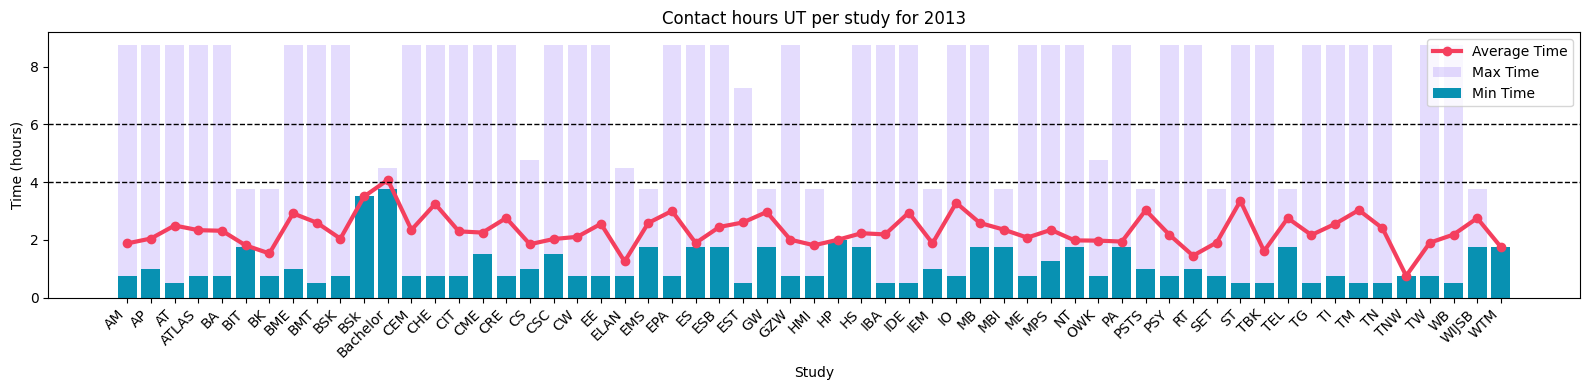

In [46]:
plot_study_time(study_time_spent_2013, "Contact hours UT per study for 2013")

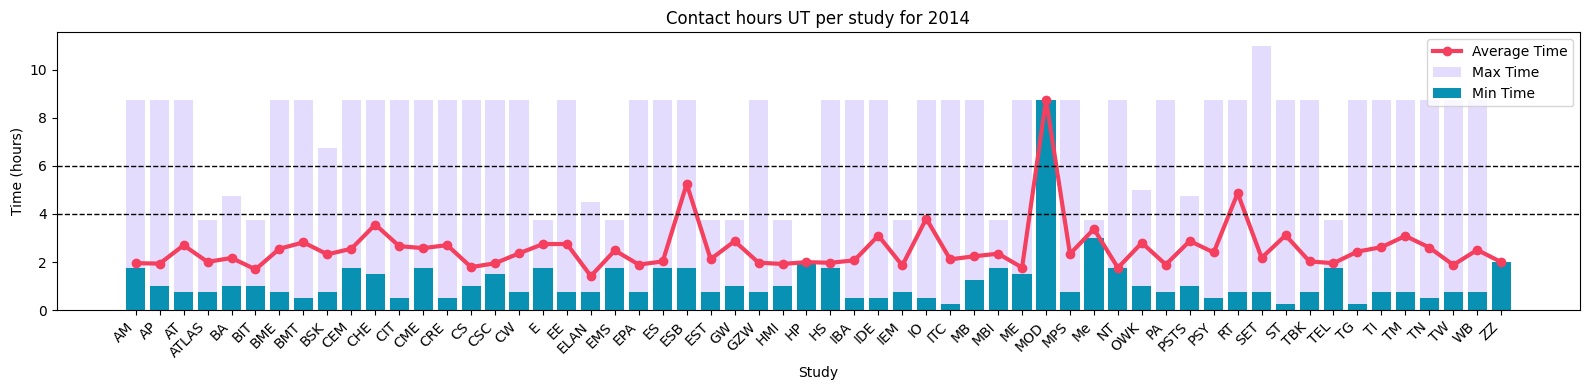

In [47]:
plot_study_time(study_time_spent_2014, "Contact hours UT per study for 2014")

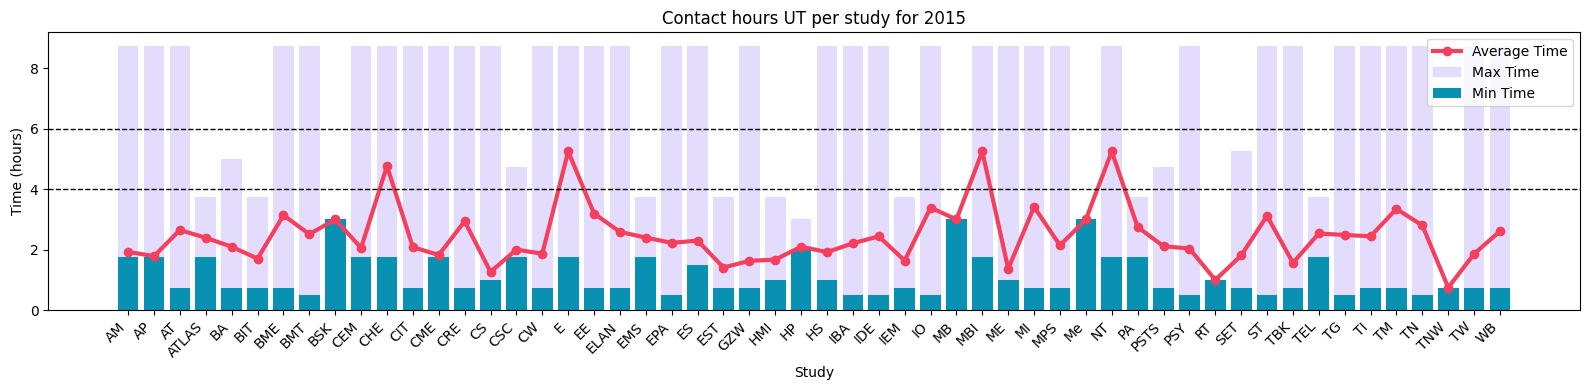

In [48]:
plot_study_time(study_time_spent_2015, "Contact hours UT per study for 2015")

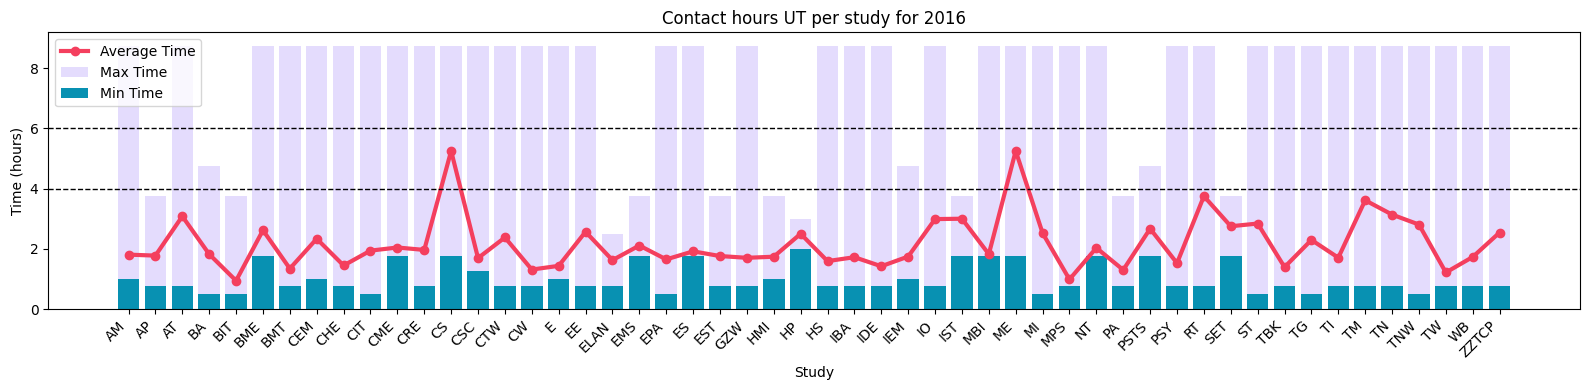

In [49]:
plot_study_time(study_time_spent_2016, "Contact hours UT per study for 2016")

##### 2. If a student has a class at the 11th and 12th college hour, then that student has no class at the 1st and 2nd college hour the next day

In [50]:
dataframe_early_lessons_2013 = check_early_lessons(dataframe_activities_2013)

In [51]:
dataframe_early_lessons_2014 = check_early_lessons(dataframe_activities_2014)

In [52]:
dataframe_early_lessons_2015 = check_early_lessons(dataframe_activities_2015)

In [53]:
dataframe_early_lessons_2016 = check_early_lessons(dataframe_activities_2016)

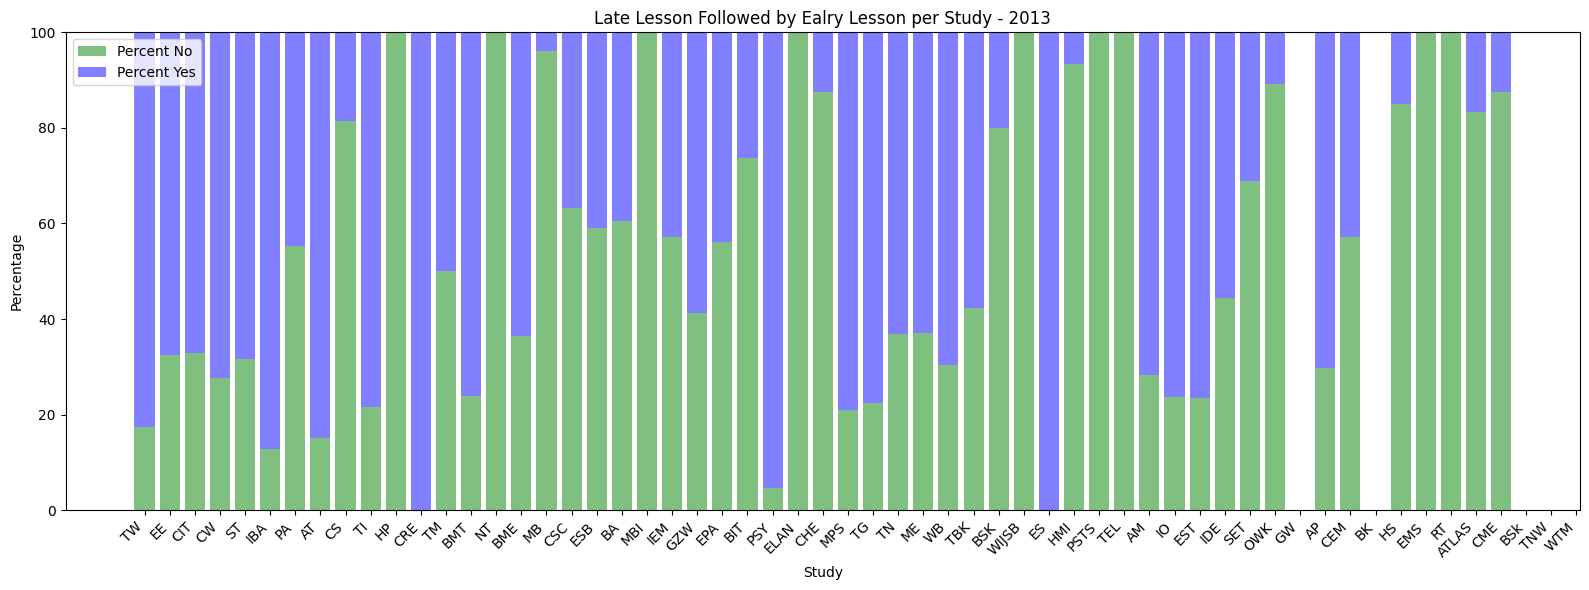

In [54]:
plot_early_lessons(dataframe_early_lessons_2013, "Late Lesson Followed by Ealry Lesson per Study - 2013")

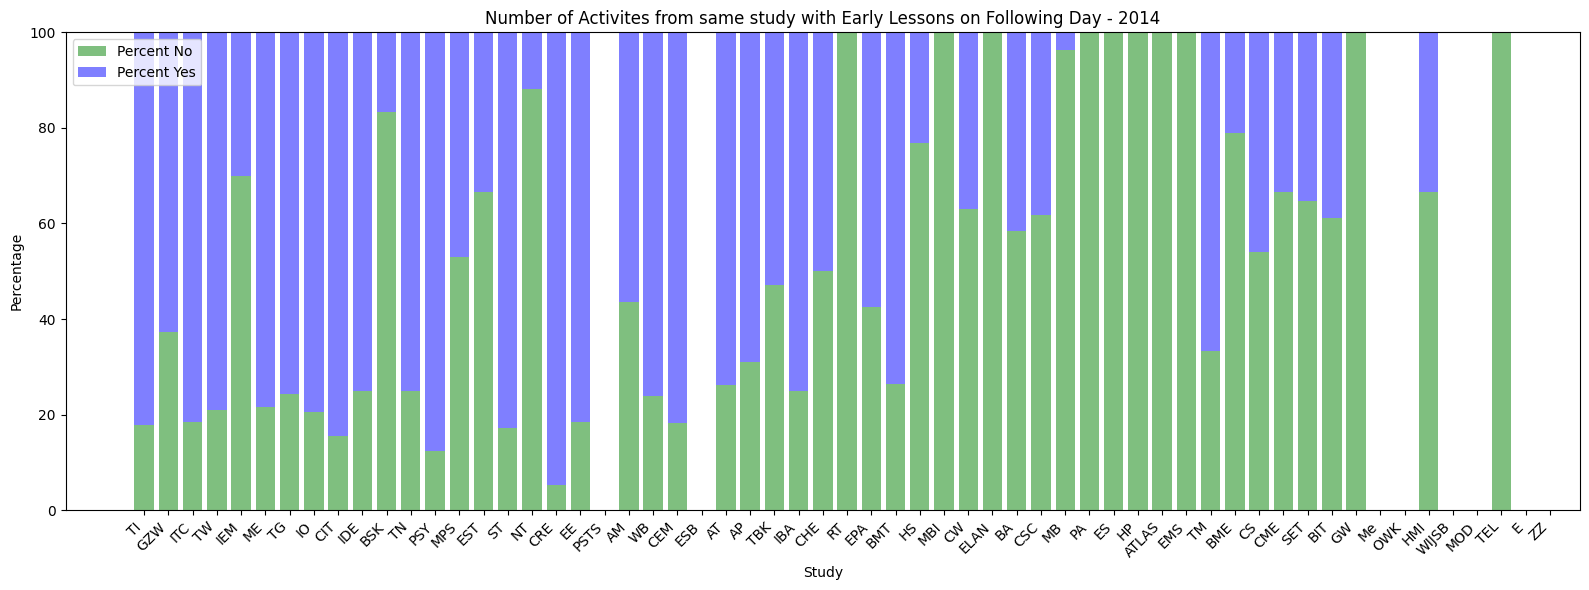

In [55]:
plot_early_lessons(dataframe_early_lessons_2014, "Number of Activites from same study with Early Lessons on Following Day - 2014")

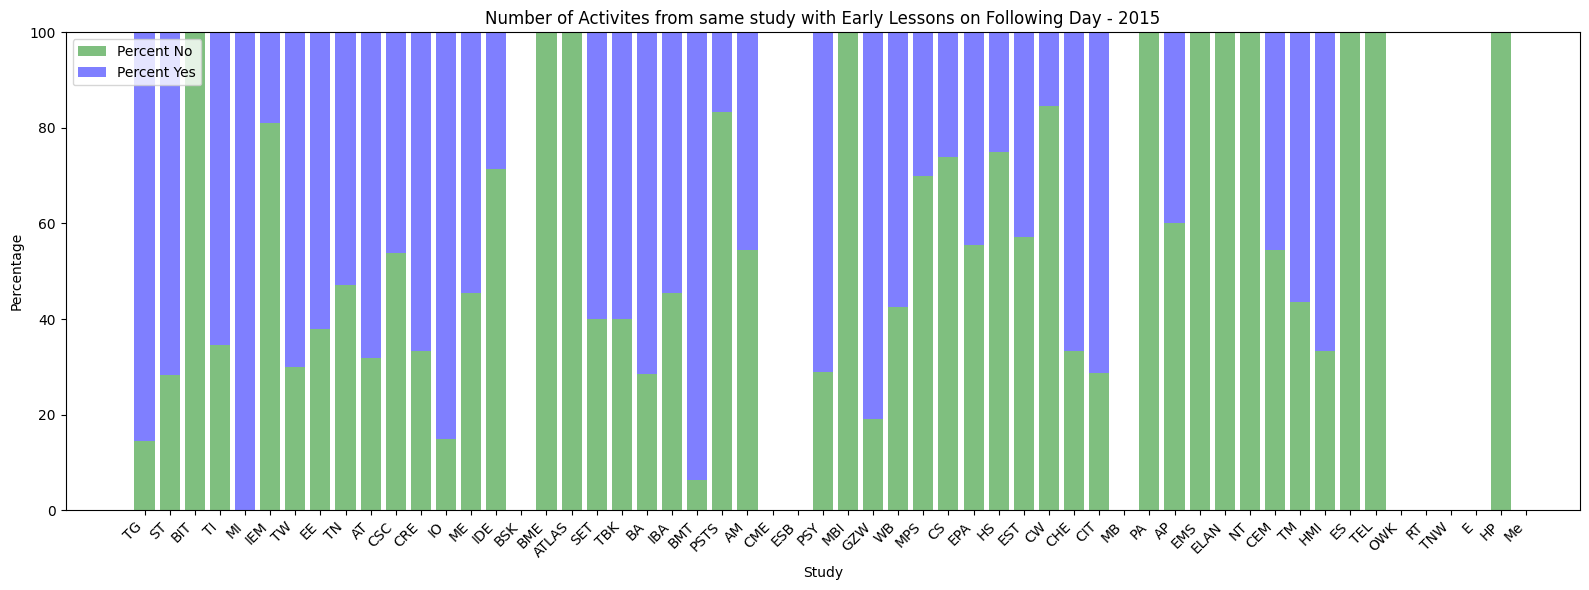

In [56]:
plot_early_lessons(dataframe_early_lessons_2015, "Number of Activites from same study with Early Lessons on Following Day - 2015")

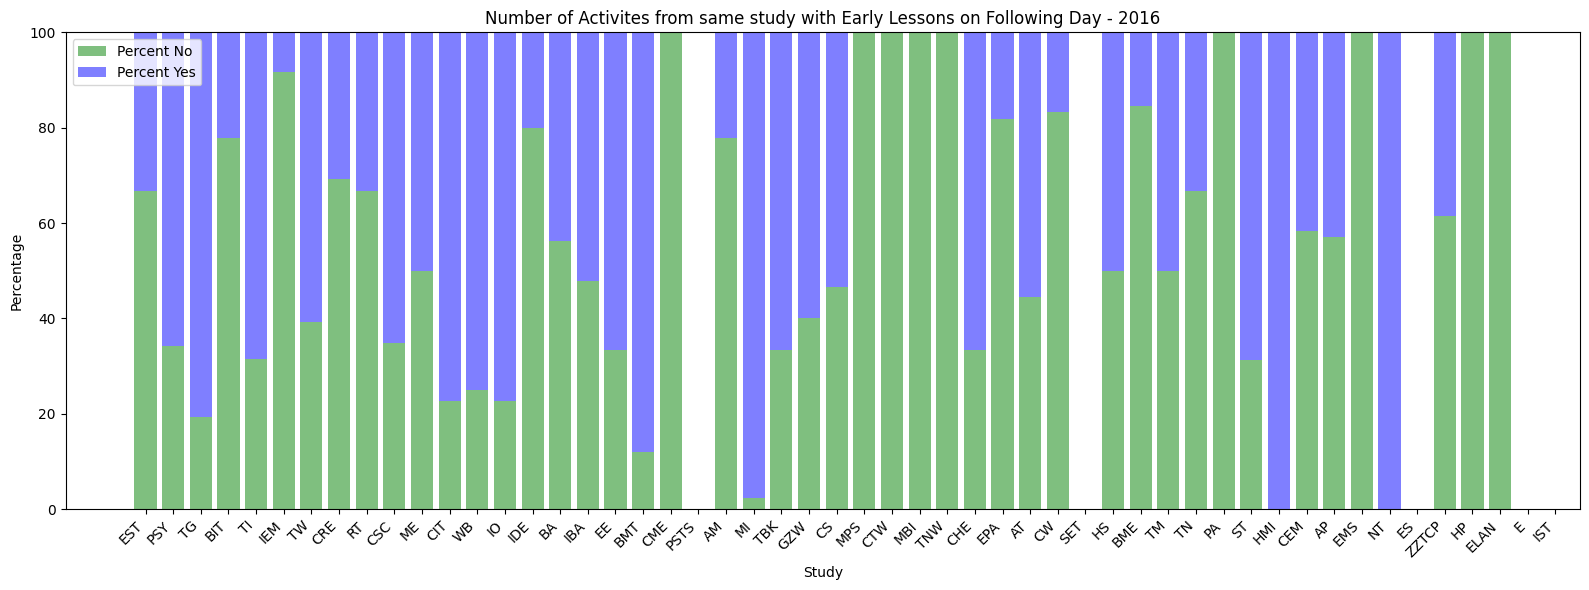

In [57]:
plot_early_lessons(dataframe_early_lessons_2016, "Number of Activites from same study with Early Lessons on Following Day - 2016")

##### 3. The timetable of students have a maximum of 11 college hours on any day. This means 8:15 clock hours, which is the time between start of the first college and the end of the last college on any day

In [58]:
study_hours_2013 = calculate_study_hours(dataframe_activities_2013)

In [59]:
study_hours_2014 = calculate_study_hours(dataframe_activities_2014)

In [60]:
study_hours_2015 = calculate_study_hours(dataframe_activities_2015)

In [61]:
study_hours_2016 = calculate_study_hours(dataframe_activities_2016)


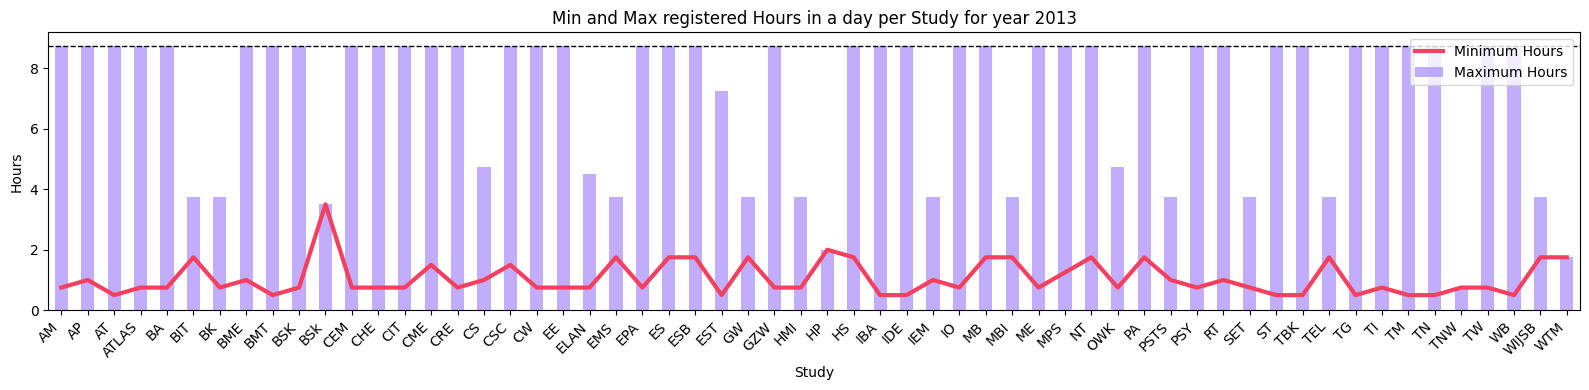

In [62]:
plot_study_hours(study_hours_2013, "Min and Max registered Hours in a day per Study for year 2013")

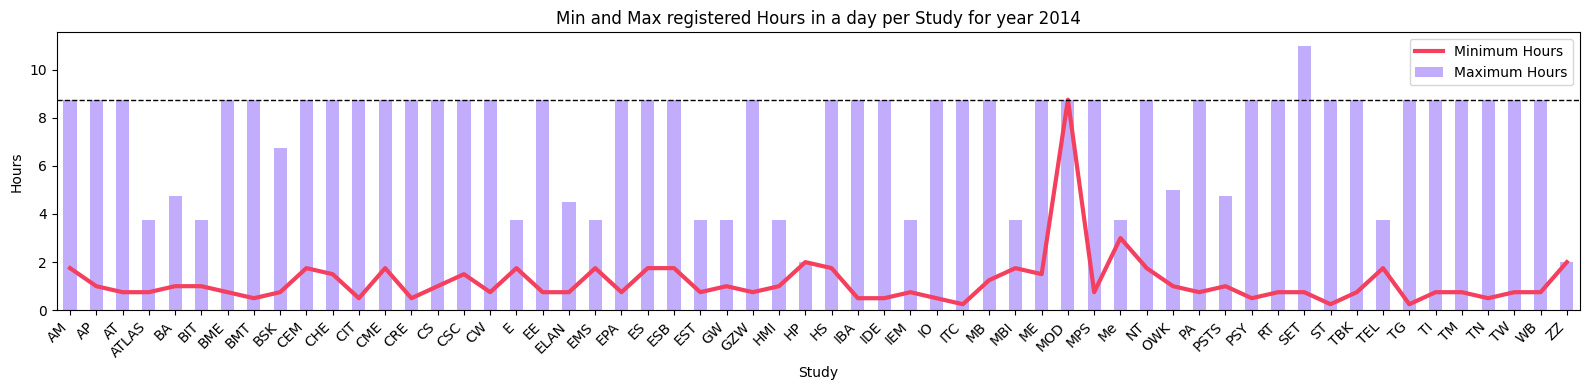

In [63]:
plot_study_hours(study_hours_2014, "Min and Max registered Hours in a day per Study for year 2014")

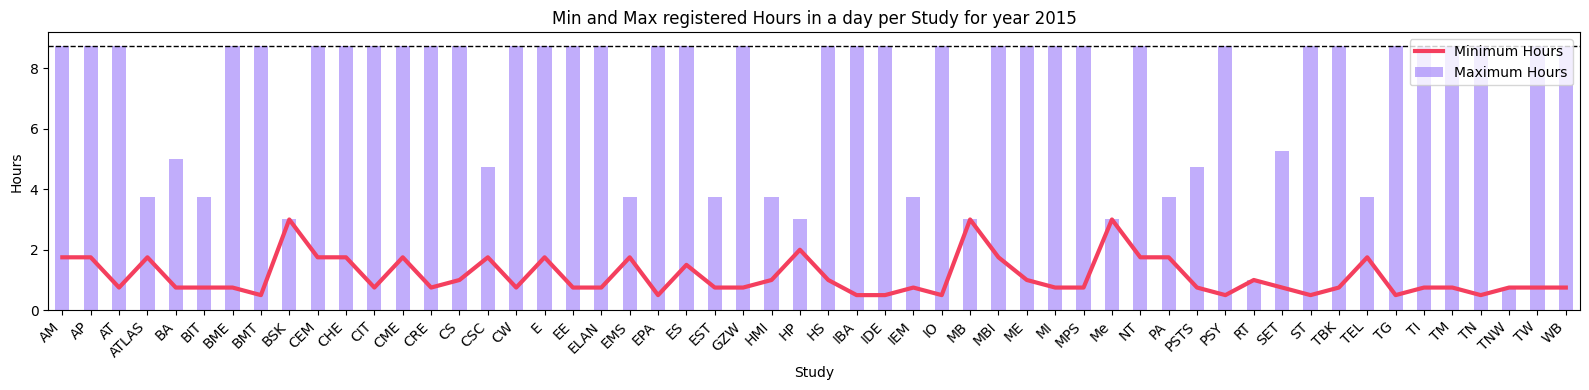

In [64]:
plot_study_hours(study_hours_2015, "Min and Max registered Hours in a day per Study for year 2015")

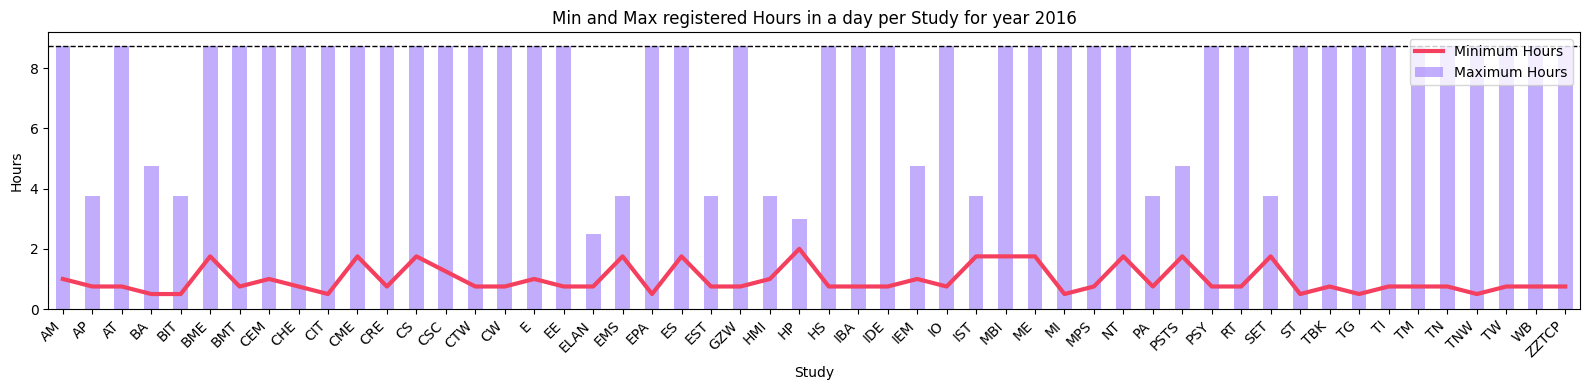

In [65]:
plot_study_hours(study_hours_2016, "Min and Max registered Hours in a day per Study for year 2016")

##### 4. At Fridays there are no evening classes

In [66]:
dataframe_fridays_2013, dataframe_fridays_2014, dataframe_fridays_2015, dataframe_fridays_2016 = generate_fridays_per_years()

In [67]:
dataframe_latest_friday_lessons_2013 = last_friday_lesson(dataframe_activities_2015, dataframe_fridays_2015)

In [68]:
dataframe_latest_friday_lessons_2014 = last_friday_lesson(dataframe_activities_2014, dataframe_fridays_2014)

In [69]:
dataframe_latest_friday_lessons_2015 = last_friday_lesson(dataframe_activities_2015, dataframe_fridays_2015)

In [70]:
dataframe_latest_friday_lessons_2016 = last_friday_lesson(dataframe_activities_2016, dataframe_fridays_2016)

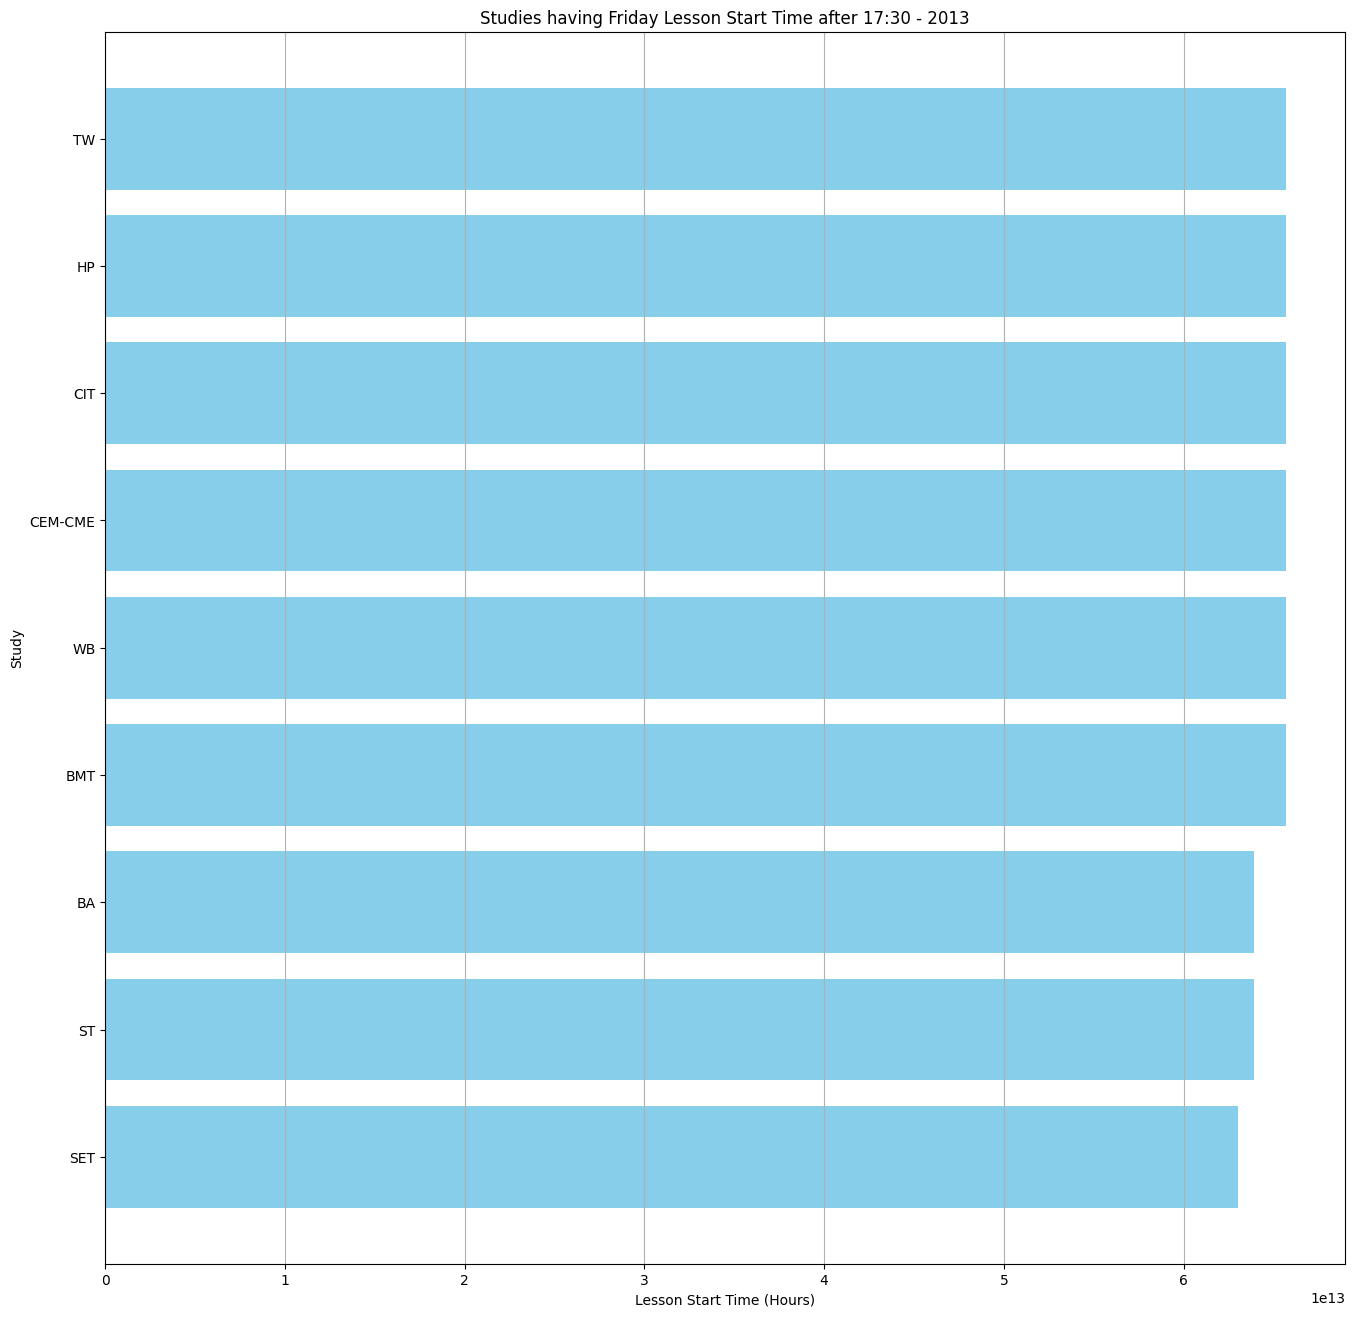

In [71]:
plot_last_friday_lesson(dataframe_latest_friday_lessons_2013, "Studies having Friday Lesson Start Time after 17:30 - 2013")

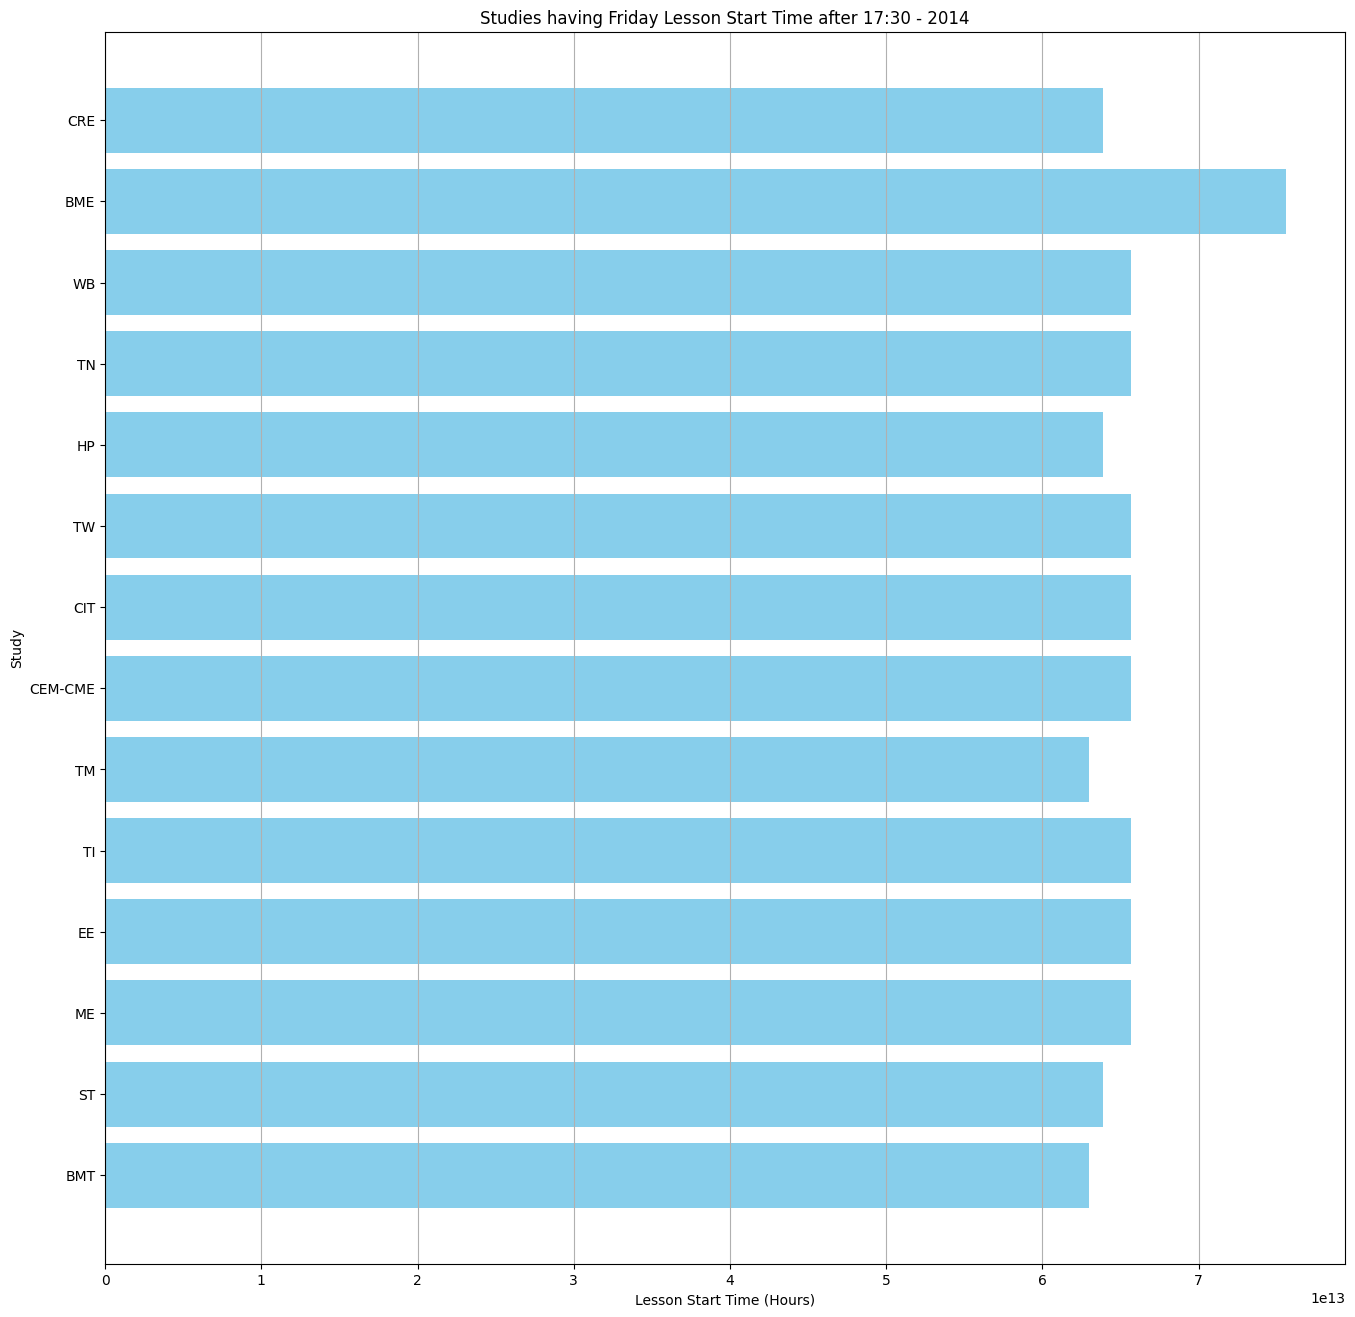

In [72]:
plot_last_friday_lesson(dataframe_latest_friday_lessons_2014, "Studies having Friday Lesson Start Time after 17:30 - 2014")

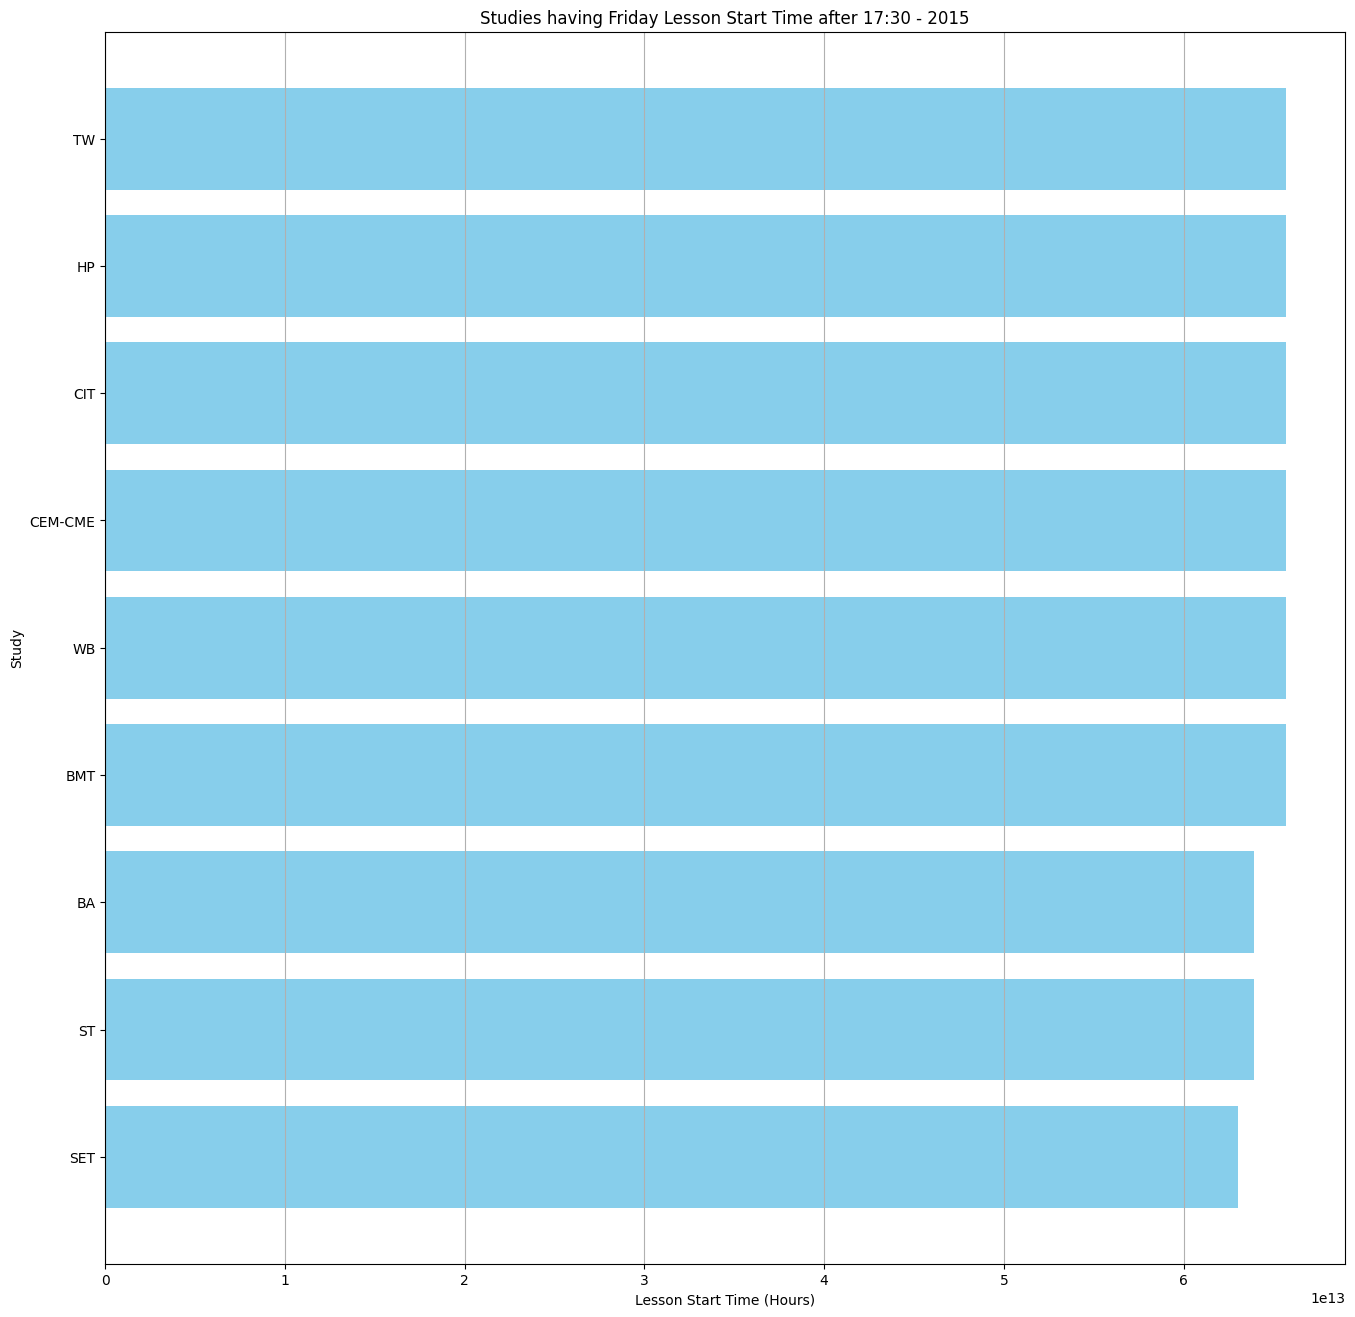

In [73]:
plot_last_friday_lesson(dataframe_latest_friday_lessons_2015, "Studies having Friday Lesson Start Time after 17:30 - 2015")

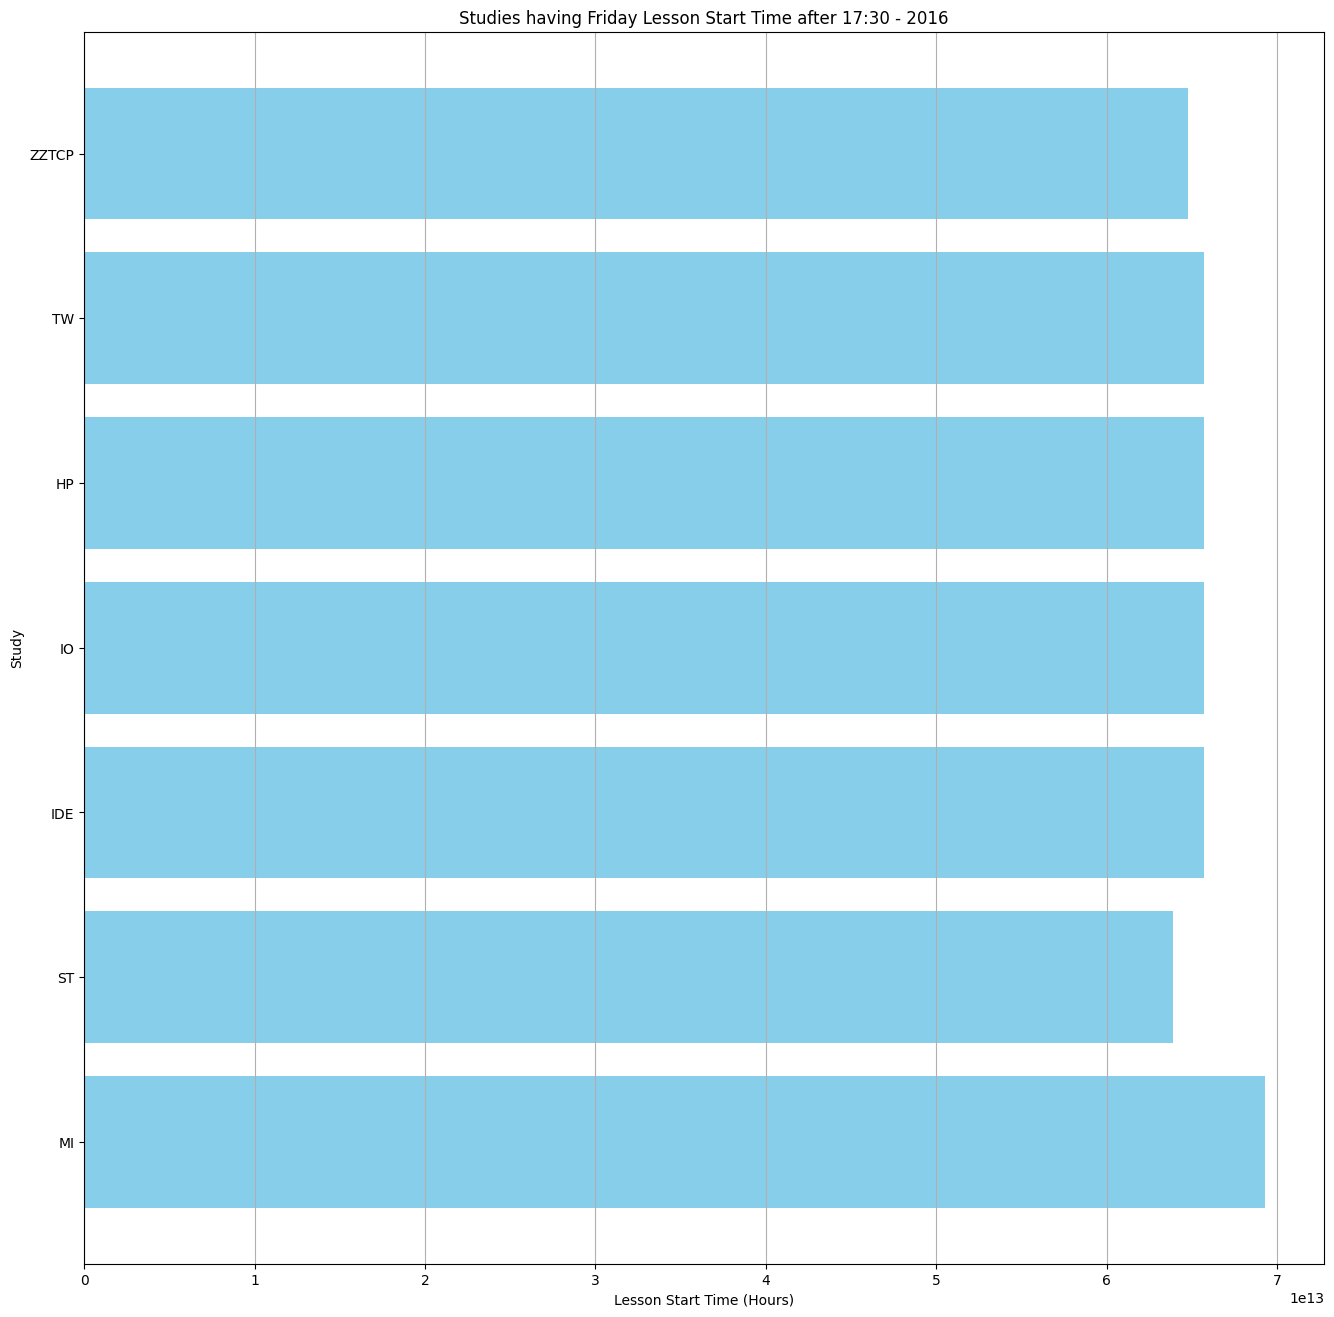

In [74]:
plot_last_friday_lesson(dataframe_latest_friday_lessons_2016, "Studies having Friday Lesson Start Time after 17:30 - 2016")

##### Sudents have a maximum of 2 free hours on in one series on any day

In [75]:
dataframe_student_free_time_2013 = calculate_series_free_time(dataframe_activities_2013)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1868115181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([


In [76]:
dataframe_student_free_time_2014 = calculate_series_free_time(dataframe_activities_2014)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1868115181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([


In [77]:
dataframe_student_free_time_2015 = calculate_series_free_time(dataframe_activities_2015)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1868115181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([


In [78]:
dataframe_student_free_time_2016 = calculate_series_free_time(dataframe_activities_2016)

dataframe_student_free_time_2013

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1868115181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([


day       used_time
0   2013-09-02 0 days 00:15:00
1   2013-09-03 0 days 00:15:00
2   2013-09-04 0 days 00:15:00
3   2013-09-05 0 days 00:15:00
4   2013-09-06 0 days 00:15:00
..         ...             ...
195 2014-07-22 0 days 01:15:00
196 2014-07-23 0 days 01:30:00
197 2014-07-24 0 days 01:15:00
198 2014-07-25 0 days 02:15:00
199 2014-08-18 0 days 02:00:00

[200 rows x 2 columns]

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


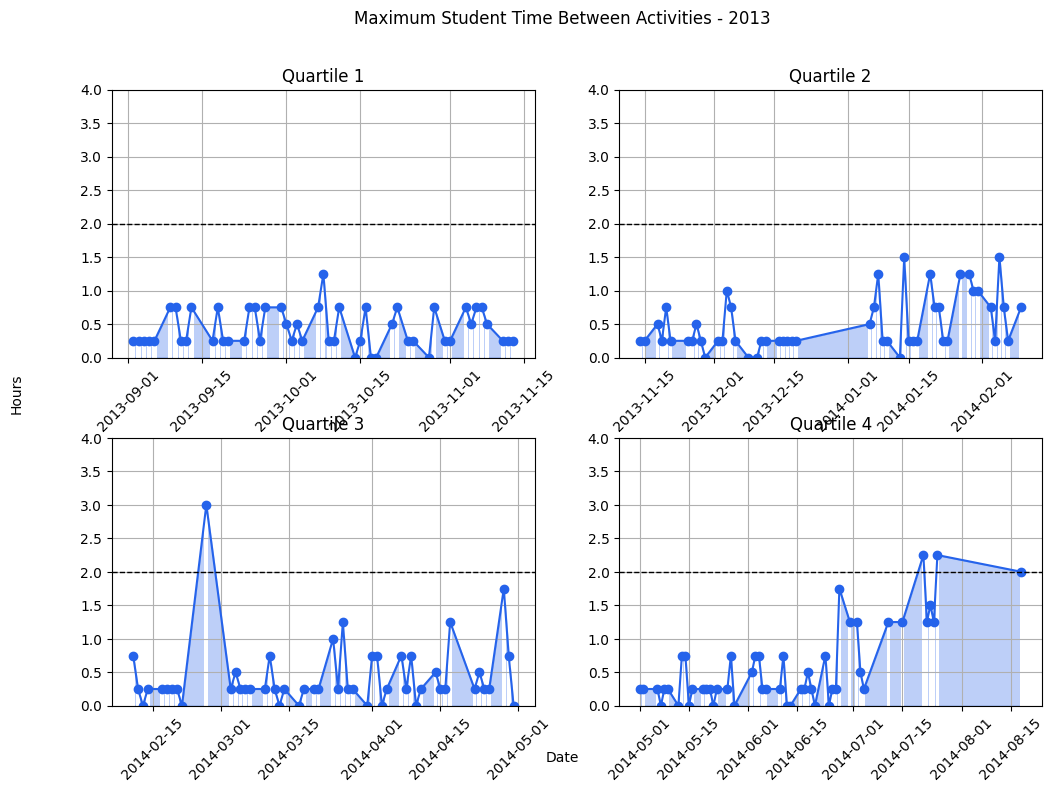

In [79]:
plot_student_free_time(dataframe_student_free_time_2013, 2013)

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


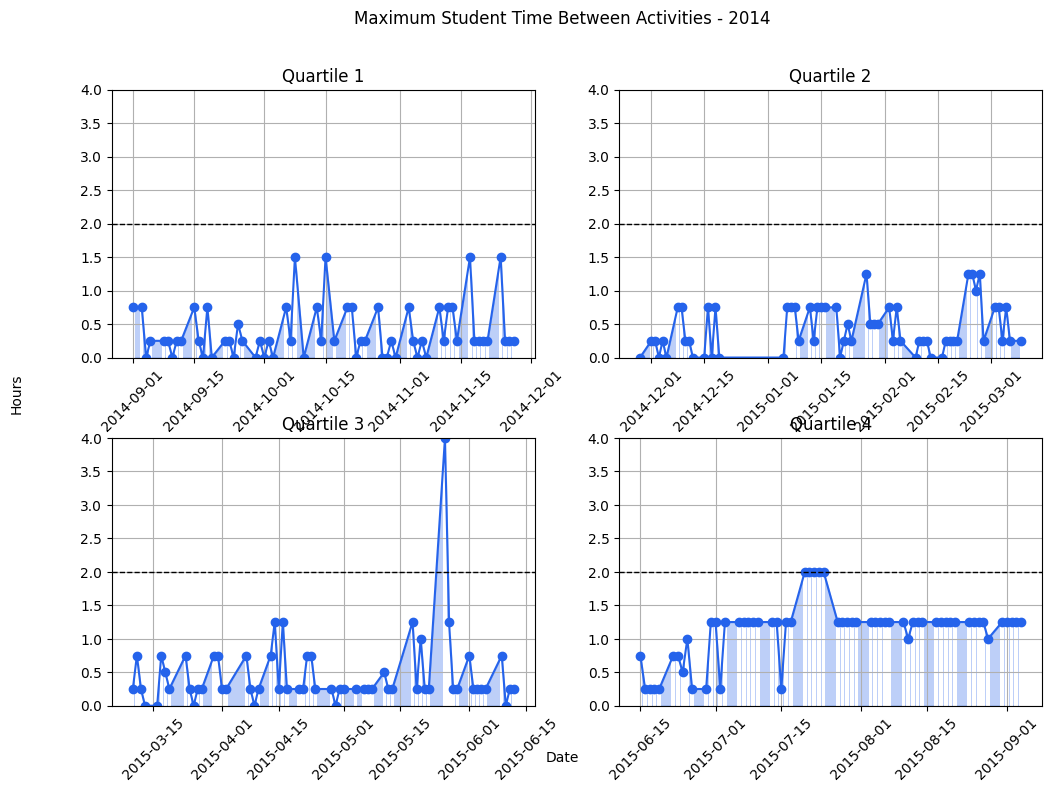

In [80]:
plot_student_free_time(dataframe_student_free_time_2014, 2014)

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


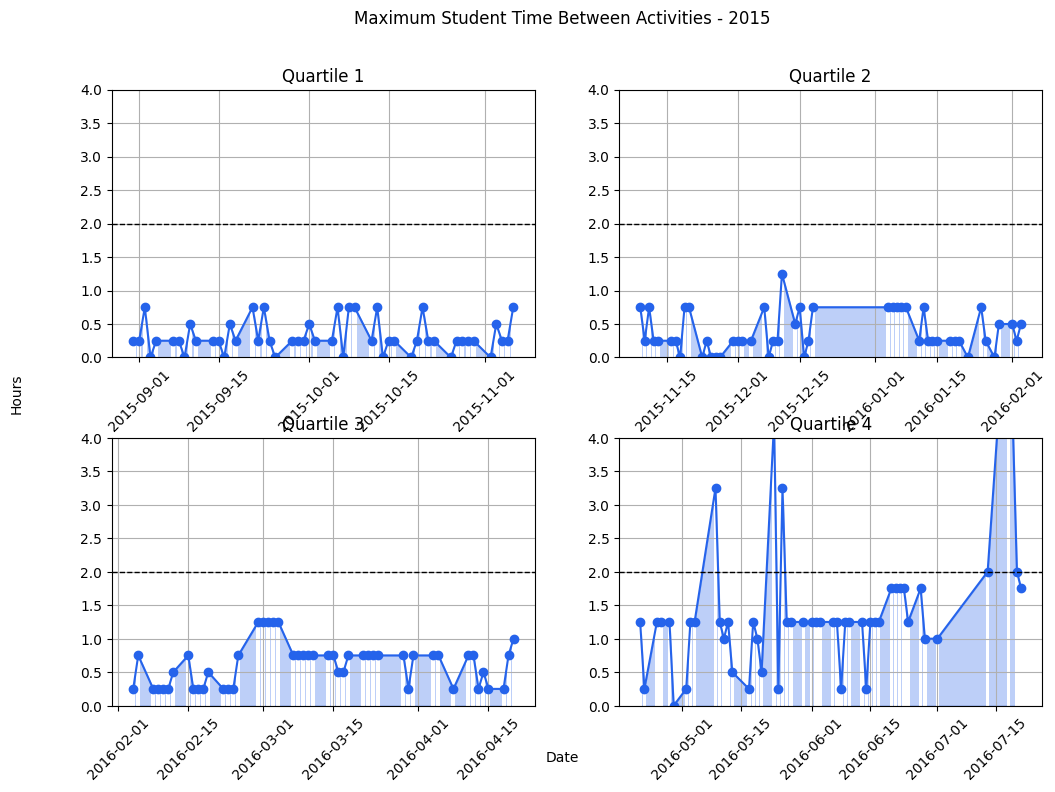

In [81]:
plot_student_free_time(dataframe_student_free_time_2015, 2015)

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


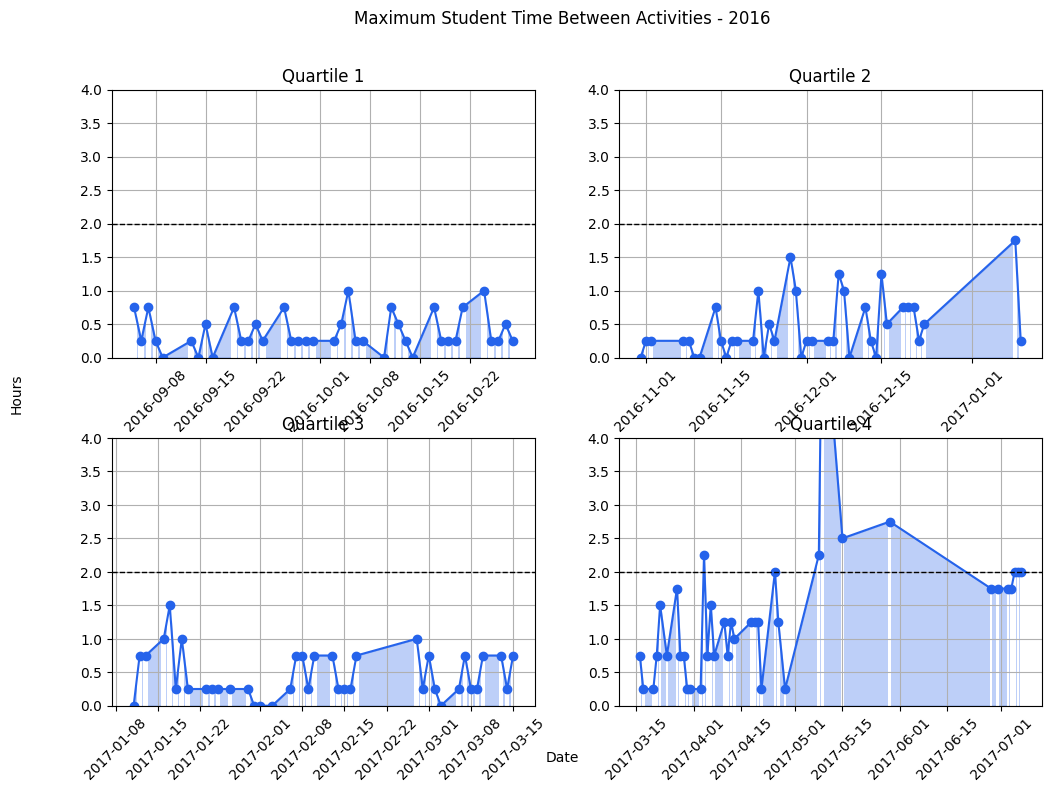

In [82]:
plot_student_free_time(dataframe_student_free_time_2016, 2016)

#### KPIs - Teachers

##### A teacher has a maximum of 8 contact hours per day

In [83]:
shard_2013 = ut.shard_dataframe(dataframe_activities_2013, ["activity_name", "activity_type", "size", "room_name"])
dataframe_teacher_hours_2013 = calculate_hours_per_day(ut_courses_osiris_2013_2014, shard_2013[0])
dataframe_teacher_hours_2013['over_worked'] = dataframe_teacher_hours_2013['max_hour_spent_per_day'] > pd.Timedelta(hours=8, minutes=45)


In [84]:
shard_2014 = ut.shard_dataframe(dataframe_activities_2014, ["activity_name", "activity_type", "size", "room_name"])
dataframe_teacher_hours_2014 = calculate_hours_per_day(ut_courses_osiris_2014_2015, shard_2014[0])
dataframe_teacher_hours_2014['over_worked'] = dataframe_teacher_hours_2014['max_hour_spent_per_day'] > pd.Timedelta(hours=8, minutes=45)

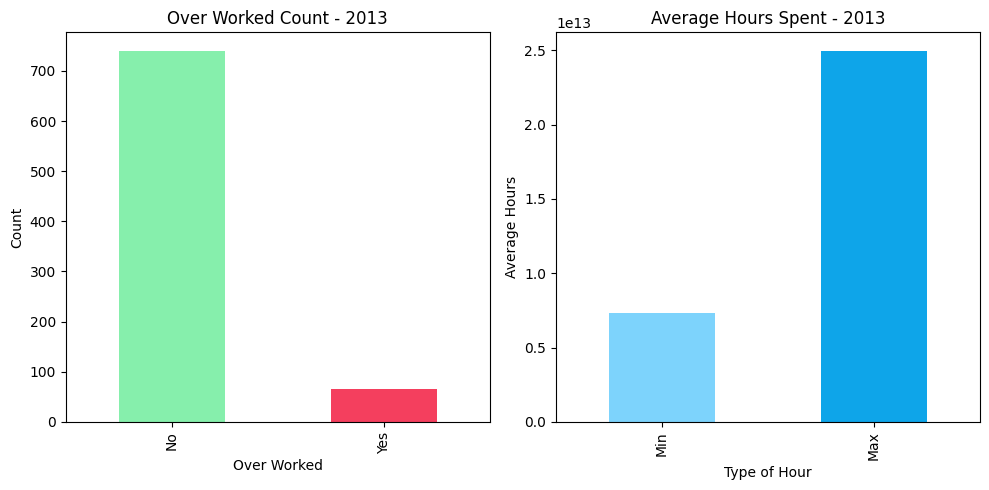

In [85]:
plot_teacher_hours_per_day(dataframe_teacher_hours_2013, 2013)

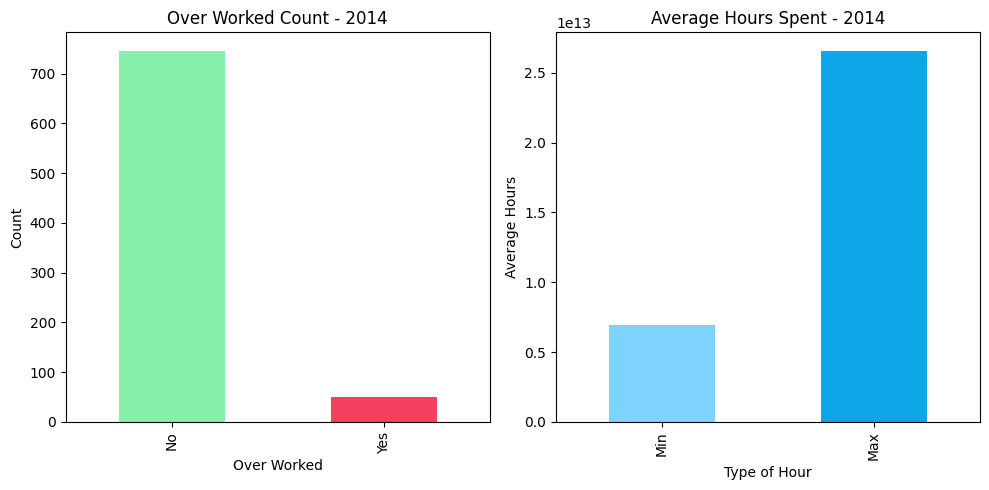

In [86]:
plot_teacher_hours_per_day(dataframe_teacher_hours_2014, 2014)

##### If a teacher has a class at the 11th and 12th college hour, then that teacher has no class at the 1st and 2nd college hour the next day

In [87]:
dataframe_teacher_classes_next_day_2013 = check_teacher_classes(ut_courses_osiris_2013_2014, shard_2013[0])

In [88]:
dataframe_teacher_classes_next_day_2014 = check_teacher_classes(ut_courses_osiris_2014_2015, shard_2014[0])

dataframe_teacher_classes_next_day_2013

teacher had_late_class had_early_morning_class_next_day
0               Vaneker           True                             True
1                  Wits           True                             True
2              Toxopeus           True                             True
3       Jauregui Becker           True                             True
4              Hoekstra           True                             True
..                  ...            ...                              ...
801              Meulen           True                             True
802            Veenstra           True                             True
803  Woud-van der Graaf           True                             True
804     Roos-Krabbenbos           True                             True
805               Kogel           True                             True

[806 rows x 3 columns]

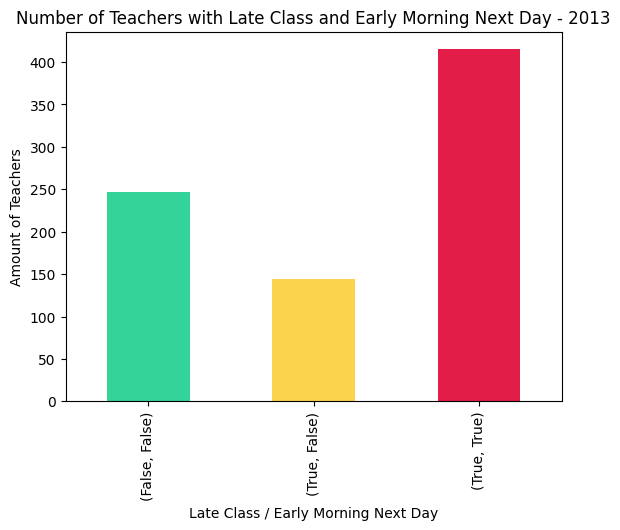

In [89]:
plot_teacher_classes(dataframe_teacher_classes_next_day_2013, "Number of Teachers with Late Class and Early Morning Next Day - 2013")

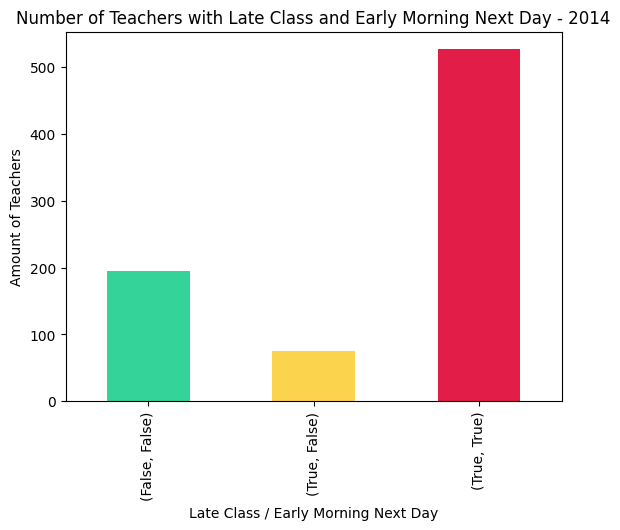

In [90]:
plot_teacher_classes(dataframe_teacher_classes_next_day_2014, "Number of Teachers with Late Class and Early Morning Next Day - 2014")

#### KPIs - Rooms


##### Rooms must have an occupation of at least 70%. Occupation is defined as follows: occupying a space (room) by the timetabling process during educational weeks.

In [91]:
shard_rooms_2013 = ut.shard_dataframe(dataframe_activities_2013, ["activity_name", "activity_description", "hostkey", "hostkey.1", "activity_type", "start_date", "end_date"])
dataframe_room_usage_2013 = analyze_room_usage(shard_rooms_2013[0])

dataframe_room_usage_2013


room occupation total_people most_popular_study
0        CI T300        100        25021                 TW
1          CR 2G      50.29         8139                PSY
2          CR 2H        100        37927                 TW
3          CR 2K        100        30495                 TW
4          CR 2L       90.1        36495                 CS
..           ...        ...          ...                ...
267    ZZ WA 1/T      42.71          612                 ME
268    ZZ WA 2/T      29.17          141                 ST
269    ZZ WA 4/T       4.17           60                IBA
270  ZZ WH 215/T      29.17            4                IDE
271  ZZ WH 217/T      43.75            8                CME

[272 rows x 4 columns]

In [92]:
shard_rooms_2014 = ut.shard_dataframe(dataframe_activities_2014, ["activity_name", "activity_description", "hostkey", "hostkey.1", "activity_type", "start_date", "end_date"])
dataframe_room_usage_2014 = analyze_room_usage(shard_rooms_2014[0])

dataframe_room_usage_2014


C:\Users\PC\AppData\Local\Temp\ipykernel_7356\258847174.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([


room  occupation total_people most_popular_study
0        CI T300       37.80         8953                PSY
1          CR 2G       58.03        12209                PSY
2          CR 2H       64.63        15895                 TW
3          CR 2K       58.48        12751                 TW
4          CR 2L       70.55        18461                 EE
..           ...         ...          ...                ...
304  ZZ VR 559/T       41.67           28                GZW
305  ZZ VR 583/T       25.00           18                 NT
306    ZZ WA 1/T       42.71           90                 TI
307    ZZ WA 2/T       29.17           90                 TI
308  ZZ WH 215/T       46.43          106                 AP

[309 rows x 4 columns]

In [93]:
shard_rooms_2015 = ut.shard_dataframe(dataframe_activities_2015, ["activity_name", "activity_description", "hostkey", "hostkey.1", "activity_type", "start_date", "end_date"])
dataframe_room_usage_2015 = analyze_room_usage(shard_rooms_2015[0])

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\258847174.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([


In [94]:
shard_rooms_2016 = ut.shard_dataframe(dataframe_activities_2016, ["activity_name", "activity_description", "hostkey", "hostley.1", "activity_type", "start_date", "end_date"])
dataframe_room_usage_2016 = analyze_room_usage(shard_rooms_2016[0])

dataframe_room_usage_2013

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\258847174.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([


room occupation total_people most_popular_study
0        CI T300        100        25021                 TW
1          CR 2G      50.29         8139                PSY
2          CR 2H        100        37927                 TW
3          CR 2K        100        30495                 TW
4          CR 2L       90.1        36495                 CS
..           ...        ...          ...                ...
267    ZZ WA 1/T      42.71          612                 ME
268    ZZ WA 2/T      29.17          141                 ST
269    ZZ WA 4/T       4.17           60                IBA
270  ZZ WH 215/T      29.17            4                IDE
271  ZZ WH 217/T      43.75            8                CME

[272 rows x 4 columns]

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_occupied["room"] = lowest_occupied['room'].str.slice(0,8)
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_occupied["room"] = highest_occupied['room'].str.slice(0,8)


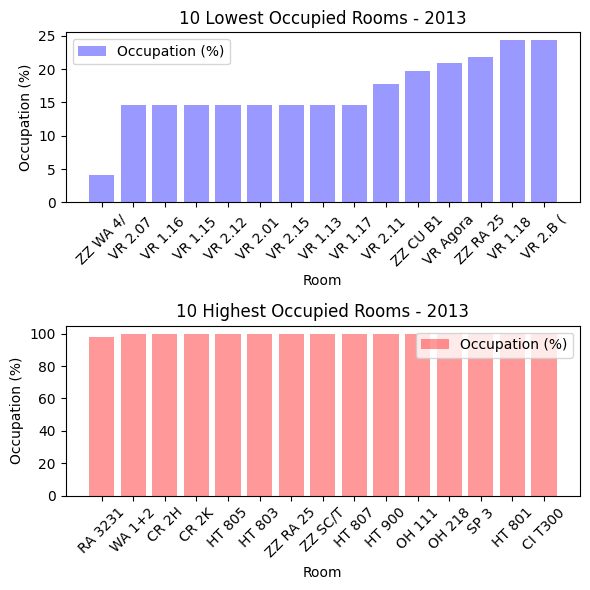

In [95]:
plot_room_usage(dataframe_room_usage_2013, 2013)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_occupied["room"] = lowest_occupied['room'].str.slice(0,8)
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_occupied["room"] = highest_occupied['room'].str.slice(0,8)


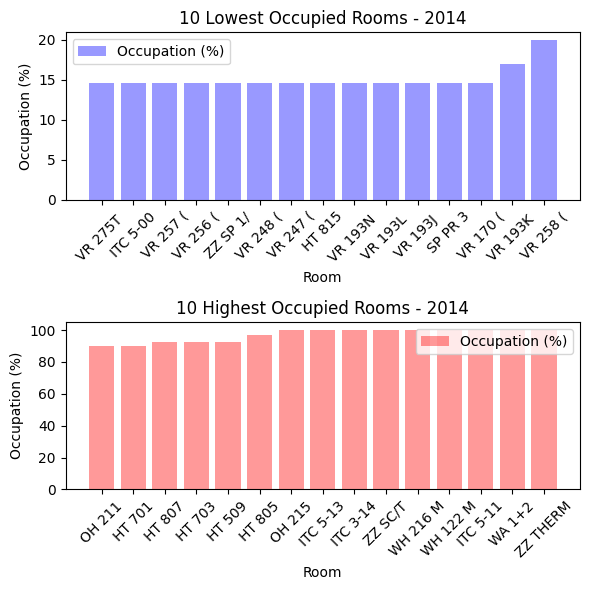

In [96]:
plot_room_usage(dataframe_room_usage_2014,2014)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_occupied["room"] = lowest_occupied['room'].str.slice(0,8)
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_occupied["room"] = highest_occupied['room'].str.slice(0,8)


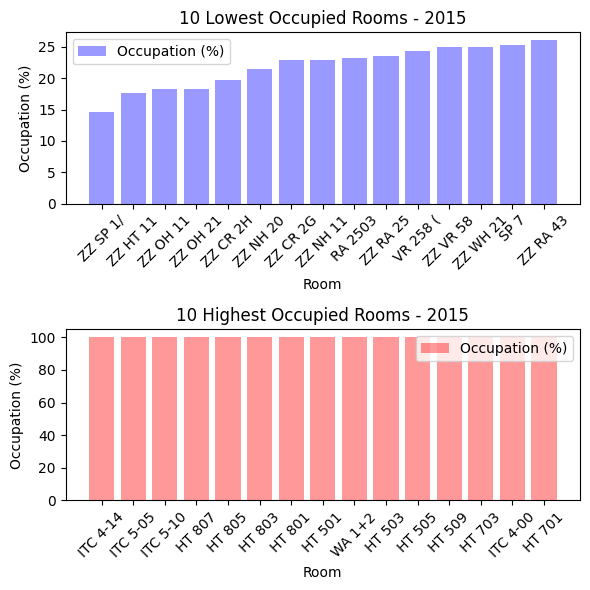

In [97]:
plot_room_usage(dataframe_room_usage_2015, 2015)

C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_occupied["room"] = lowest_occupied['room'].str.slice(0,8)
C:\Users\PC\AppData\Local\Temp\ipykernel_7356\1359733042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_occupied["room"] = highest_occupied['room'].str.slice(0,8)


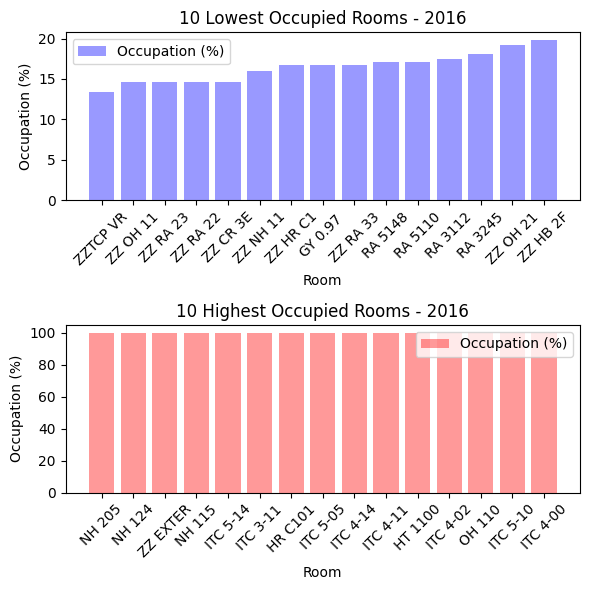

In [98]:
plot_room_usage(dataframe_room_usage_2016, 2016)